# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Mouliraj A K


# **Project Summary -**

the dataset was thoroughly analyzed to understand the distribution, relationships, and patterns among variables affecting credit scores. Initial checks were performed for missing values, outliers, and data imbalances across credit score categories. Key numerical features such as income, outstanding debt, monthly balance, and credit mix were examined using histograms, boxplots, and density plots to detect skewness and anomalies. Categorical features like payment behavior, credit history age, and occupation were visualized through bar plots and count plots to assess their impact on credit score distribution. Correlation analysis and heatmaps were applied to identify relationships among numerical variables, highlighting strong dependencies such as between credit utilization and monthly balance. Additionally, class distribution was studied to check for imbalance among "Good," "Standard," and "Poor" credit categories, ensuring appropriate strategies like resampling could be planned. Overall, EDA provided critical insights into data quality, variable importance, and feature-target relationships, laying the foundation for effective preprocessing and model building. and using that data to develop as odel that could predict credit.

# **GitHub Link -**

Provide your GitHub Link here.



# **Problem Statement**


Assessing the creditworthiness of individuals is a critical challenge for financial service providers like Paisabazaar. Traditional methods of evaluating credit scores often rely on limited parameters and manual assessment, which can lead to inefficiencies, misclassification, and increased risk of loan defaults. With the growing volume of customer data, there is a pressing need for an automated, data driven solution that can accurately classify individuals into credit score categories such as Good, Standard, or Poor. The problem, therefore, is to build a predictive model that leverages customer information such as income, credit card usage, outstanding debt, and payment behavior—to classify credit scores reliably. Solving this problem will not only help minimize credit risk for financial institutions but also enable Paisabazaar to provide personalized and effective financial product recommendations to its customers.

#### **Define Your Business Objective?**

The goal is to build a model that can predict whether a person’s credit score is Good, Standard, or Poor based on their financial and behavioral data, such as income, credit card usage, outstanding debt, and payment history. This will help Paisabazaar quickly identify high-risk and low-risk customers, reduce chances of loan defaults, and recommend the right financial products to each customer.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


### Dataset Loading

In [ ]:
# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Almabetter/Data/dataset.csv')

### Dataset First View

In [ ]:
# Data - First View
data

ID  Customer_ID  Month           Name   Age          SSN  \
0        5634         3392      1  Aaron Maashoh  23.0  821000265.0   
1        5635         3392      2  Aaron Maashoh  23.0  821000265.0   
2        5636         3392      3  Aaron Maashoh  23.0  821000265.0   
3        5637         3392      4  Aaron Maashoh  23.0  821000265.0   
4        5638         3392      5  Aaron Maashoh  23.0  821000265.0   
...       ...          ...    ...            ...   ...          ...   
99995  155625        37932      4          Nicks  25.0   78735990.0   
99996  155626        37932      5          Nicks  25.0   78735990.0   
99997  155627        37932      6          Nicks  25.0   78735990.0   
99998  155628        37932      7          Nicks  25.0   78735990.0   
99999  155629        37932      8          Nicks  25.0   78735990.0   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                3.0   
1      Scientist       19114.12            1824.843333                3.0   
2      Scientist       19114.12            1824.843333                3.0   
3      Scientist       19114.12            1824.843333                3.0   
4      Scientist       19114.12            1824.843333                3.0   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                4.0   
99996   Mechanic       39628.99            3359.415833                4.0   
99997   Mechanic       39628.99            3359.415833                4.0   
99998   Mechanic       39628.99            3359.415833                4.0   
99999   Mechanic       39628.99            3359.415833                4.0   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                  265.0                     No            49.574949   
1                  266.0                     No            49.574949   
2                  267.0                     No            49.574949   
3                  268.0                     No            49.574949   
4                  269.0                     No            49.574949   
...                  ...                    ...                  ...   
99995              378.0                     No            35.104023   
99996              379.0                     No            35.104023   
99997              380.0                     No            35.104023   
99998              381.0                     No            35.104023   
99999              382.0                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    21.465380   High_spent_Small_value_payments   
1                    21.465380    Low_spent_Large_value_payments   
2                    21.465380   Low_spent_Medium_value_payments   
3                    21.465380    Low_spent_Small_value_payments   
4                    21.465380  High_spent_Medium_value_payments   
...                        ...                               ...   
99995                24.028477   High_spent_Large_v

In [ ]:
data.head()

ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \
0            809.98                 26.822620              265.0   
1            809.98                 31.944960              266.0   
2            809.98                 28.609352              267.0   
3            809.98                 31.377862              268.0   
4            809.98                 24.797347              269.0   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                     No            49.574949                 21.46538   
1                     No            49.574949                 21.46538   
2                     No            49.574949                 21.46538   
3                     No            49.574949                 21.46538   
4                     No            49.574949                 21.46538   

                  Payment_Behaviour Monthly_Balance  Credit_Score  
0   High_spent_Small_value_payments      312.494089          Good  
1    Low_spent_Large_value_payments      284.629162          Good  
2   Low_spent_Medium_value_payments      331.209863          Good  
3    Low_spent_Small_value_payments      223.451310          Good  
4  High_spent_Medium_value_payments      341.489231          Good  

[5 rows x 28 columns]

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(100000, 28)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
num_duplicates = data.duplicated()
num_duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [ ]:
print(f'The number of duplicates is: {num_duplicates.sum()}')

The number of duplicates is: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values_count = data.isnull()
missing_values_count

ID  Customer_ID  Month   Name    Age    SSN  Occupation  \
0      False        False  False  False  False  False       False   
1      False        False  False  False  False  False       False   
2      False        False  False  False  False  False       False   
3      False        False  False  False  False  False       False   
4      False        False  False  False  False  False       False   
...      ...          ...    ...    ...    ...    ...         ...   
99995  False        False  False  False  False  False       False   
99996  False        False  False  False  False  False       False   
99997  False        False  False  False  False  False       False   
99998  False        False  False  False  False  False       False   
99999  False        False  False  False  False  False       False   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0              False                  False              False  ...   
1              False                  False              False  ...   
2              False                  False              False  ...   
3              False                  False              False  ...   
4              False                  False              False  ...   
...              ...                    ...                ...  ...   
99995          False                  False              False  ...   
99996          False                  False              False  ...   
99997          False                  False              False  ...   
99998          False                  False              False  ...   
99999          False                  False              False  ...   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0           False             False                     False   
1           False             False                     False   
2           False             False                     False   
3           False             False                     False   
4           False             False                     False   
...           ...               ...                       ...   
99995       False             False                     False   
99996       False             False                     False   
99997       False             False                     False   
99998       False             False                     False   
99999       False             False                     False   

       Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                   False                  False                False   
1                   False                  False                False   
2                   False                  False                False   
3                   False                  False                False   
4                   False                  False                False   
...                   ...                    ...                  ...   
99995               False                  False                False   
99996               False                  False                False   
99997               False                  False                False   
99998               False                  False                False   
99999               False                  False                False   

       Amount_invested_monthly  Payment_Behaviour  Monthly_Balance  \
0                        False              False            False   
1                        False              False            False   
2                        False              False            False   
3                        False              False            False   
4                        False              False            False   
...                        ...                ...              ...   
99995                    False              False            False   
99996                    False              False            False   
99997                    False          

In [ ]:
print(f'The misssing value count is: {missing_values_count.sum()}')

The misssing value count is: ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


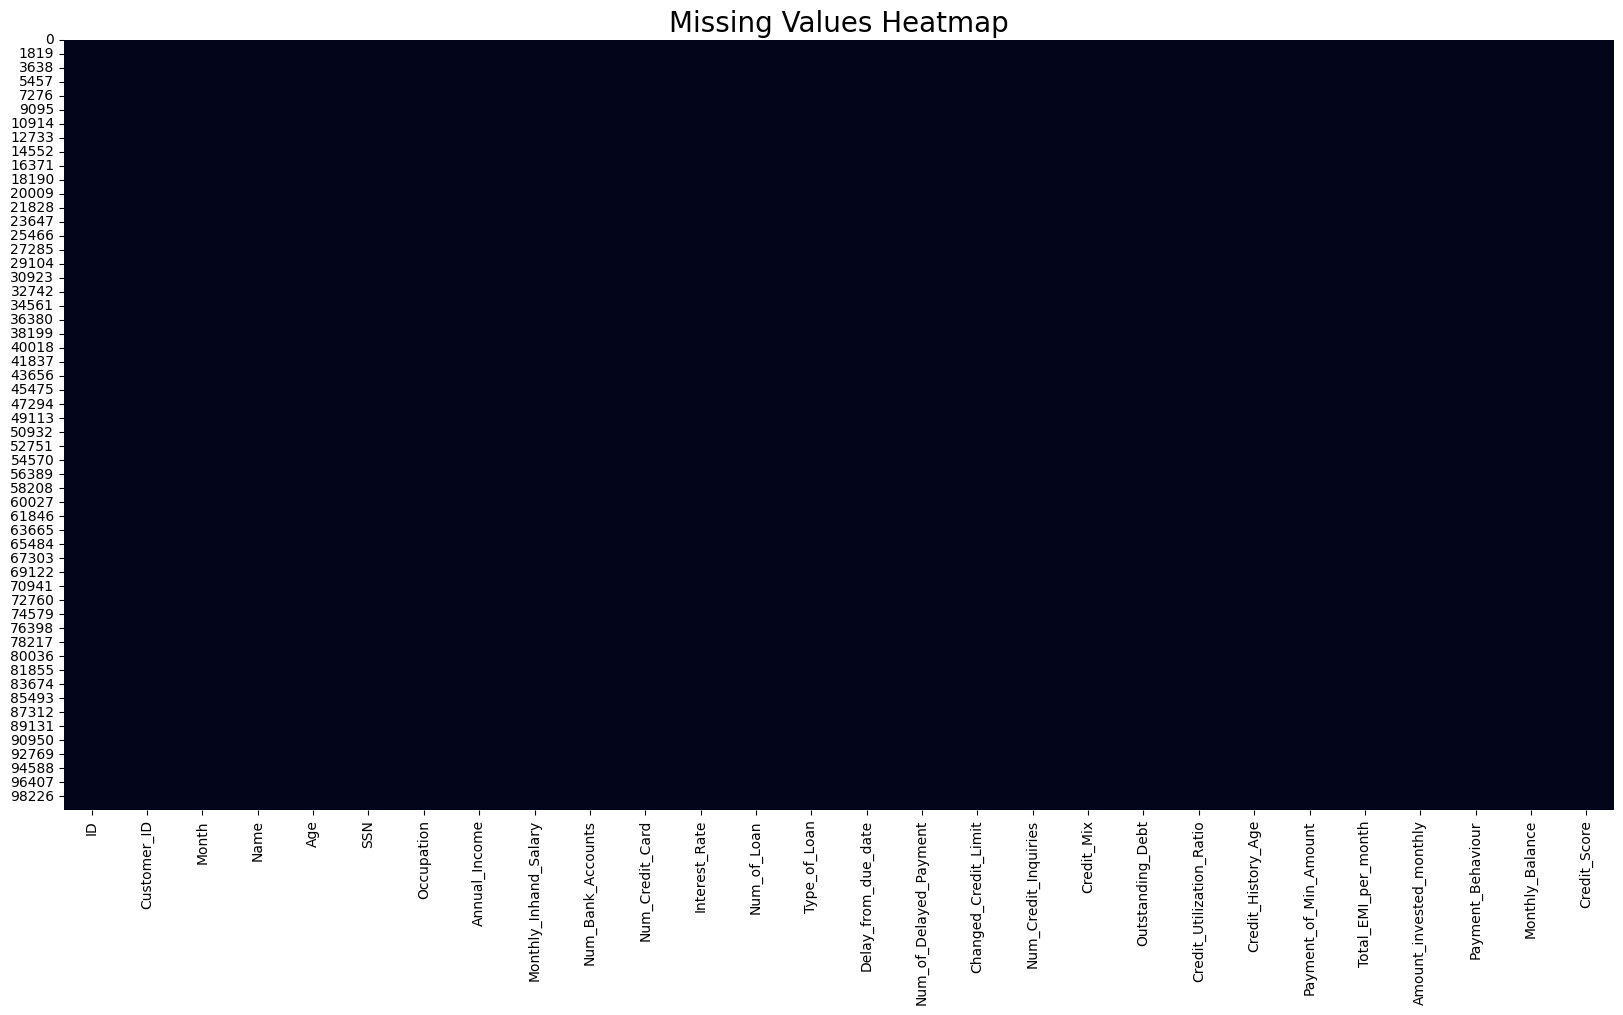

In [ ]:
# Visualizing the missing values
# Using heatmap that gives bothe the count and position of each null vallue
plt.figure(figsize=(20, 10))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing Values Heatmap', fontsize=20)
plt.show()

### What did you know about your dataset?

The dataset is a collection of financial data for 100,000 individuals, with no missing values. It includes a mix of numerical features like annual income, interest rate, and outstanding debt, and categorical features such as occupation, type of loan, and payment behavior. The goal is to predict the credit score, which is a three-class target variable with categories of "Good," "Standard," and "Poor."

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(data.columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [ ]:
# Dataset Describe
data.describe()

ID    Customer_ID          Month            Age  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    80631.500000   25982.666640       4.500000      33.316340   
std     43301.486619   14340.543051       2.291299      10.764812   
min      5634.000000    1006.000000       1.000000      14.000000   
25%     43132.750000   13664.500000       2.750000      24.000000   
50%     80631.500000   25777.000000       4.500000      33.000000   
75%    118130.250000   38385.000000       6.250000      42.000000   
max    155629.000000   50999.000000       8.000000      56.000000   

                SSN  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  1.000000e+05  100000.000000          100000.000000      100000.000000   
mean   5.004617e+08   50505.123449            4197.270835           5.368820   
std    2.908267e+08   38299.422093            3186.432497           2.593314   
min    8.134900e+04    7005.930000             303.645417           0.000000   
25%    2.451686e+08   19342.972500            1626.594167           3.000000   
50%    5.006886e+08   36999.705000            3095.905000           5.000000   
75%    7.560027e+08   71683.470000            5957.715000           7.000000   
max    9.999934e+08  179987.280000           15204.633333          11.000000   

       Num_Credit_Card  Interest_Rate  ...  Delay_from_due_date  \
count    100000.000000   100000.00000  ...         100000.00000   
mean          5.533570       14.53208  ...             21.08141   
std           2.067098        8.74133  ...             14.80456   
min           0.000000        1.00000  ...              0.00000   
25%           4.000000        7.00000  ...             10.00000   
50%           5.000000       13.00000  ...             18.00000   
75%           7.000000       20.00000  ...             28.00000   
max          11.000000       34.00000  ...             62.00000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count           100000.000000         100000.000000         100000.000000   
mean                13.313120             10.470323              5.798250   
std                  6.237166              6.609481              3.867826   
min                  0.000000              0.500000              0.000000   
25%                  9.000000              5.380000              3.000000   
50%                 14.000000              9.400000              5.000000   
75%                 18.000000             14.850000              8.000000   
max                 25.000000             29.980000             17.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
count     100000.000000             100000.000000       100000.000000   
mean        1426.220376                 32.285173          221.220460   
std         1155.129026                  5.116875           99.680716   
min            0.230000                 20.000000            1.000000   
25%          566.072500                 28.052567          144.000000   
50%         1166.155000                 32.305784          219.000000   
75%         1945.962500                 36.496663          302.000000   
max         4998.070000                 50.000000          404.000000   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
count        100000.000000            100000.000000    100000.000000  
mean            107.699208                55.101315       392.697586  
std             132.267056                39.006932       201.652719  
min               0.000000                 0.000000         0.007760  
25%              29.268886                27.959111       267.615983  
50%              66.462304                45.156550       333.865366  
75%             147.392573                71.295797       463.215683  
max            1779.103254               434.191089      1183.930696  

[8 rows x 21 columns]

### Variables Description

ID: A unique identification number for each row/entry.

Customer_ID: A unique identifier for each customer.

Month: The month of the year.

Name: The name of the person.

Age: The age of the person.

SSN: Social Security Number, a unique identifier for the individual.

Occupation: The occupation of the person.

Annual_Income: The total annual income of the person.

Monthly_Inhand_Salary: The monthly base salary.

Num_Bank_Accounts: The number of bank accounts the person holds.

Num_Credit_Card: The number of credit cards the person has.

Interest_Rate: The interest rate on any loans or credit products.

Num_of_Loan: The total number of loans a person has.

Type_of_Loan: The specific types of loans the person has ("Auto Loan," "Home Loan").

Delay_from_due_date: The average number of days a payment is delayed from its due date.

Num_of_Delayed_Payment: The number of times a person has had a delayed payment.

Changed_Credit_Limit: The amount by which the credit limit has changed, likely in a specific time frame.

Num_Credit_Inquiries: The number of credit inquiries made by the individual.

Credit_Mix: The mix of credit types ("Good," "Standard," "Bad").

Outstanding_Debt: The total amount of debt owed by the person.

Credit_Utilization_Ratio: The percentage of available credit that is currently being used.

Credit_History_Age: The length of the person's credit history in years and months.

Payment_of_Min_Amount: Indicates whether the person pays only the minimum amount due on their credit accounts.

Total_EMI_per_month: The total Equated Monthly Installment (EMI) amount paid per month.

Amount_invested_monthly: The amount of money invested each month.

Payment_Behaviour: The behavior of the person's payments (e.g., "High_spent_Small_value_payments").

Monthly_Balance: The monthly balance in the person's bank accounts.

Credit_Score: The target variable, a categorical rating of the person's creditworthiness ("Good," "Standard," or "Poor").

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in data.columns:
    print(f"Column '{col}':")
    unique_values = data[col].unique()
    num_unique = data[col].nunique()
    print(f"Number of unique values: {num_unique}")
    print(f"Unique values: {unique_values}")
    print("\n" + "-"*50)

Column 'ID':
Number of unique values: 100000
Unique values: [  5634   5635   5636 ... 155627 155628 155629]

--------------------------------------------------
Column 'Customer_ID':
Number of unique values: 12500
Unique values: [ 3392  8625 11708 ... 44897 34304 37932]

--------------------------------------------------
Column 'Month':
Number of unique values: 8
Unique values: [1 2 3 4 5 6 7 8]

--------------------------------------------------
Column 'Name':
Number of unique values: 10128
Unique values: ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

--------------------------------------------------
Column 'Age':
Number of unique values: 43
Unique values: [23. 28. 34. 54. 55. 21. 31. 33. 30. 24. 44. 45. 40. 41. 32. 35. 36. 39.
 37. 20. 46. 26. 42. 19. 48. 38. 43. 22. 16. 18. 15. 27. 25. 14. 17. 47.
 53. 56. 29. 49. 51. 50. 52.]

--------------------------------------------------
Column 'SSN':
Number of unique values: 12500
Unique values: 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df = data.drop(columns=['Name', 'SSN'])

In [ ]:
good_credit_count = data[data['Credit_Score'] == 'Good'].shape[0]
std_credit_count = data[data['Credit_Score'] == 'Standard'].shape[0]
poor_credit_count = data[data['Credit_Score'] == 'Poor'].shape[0]

print(f"Good Credit Count: {good_credit_count}")
print(f"Standard Credit Count: {std_credit_count}")
print(f"Poor Credit Count: {poor_credit_count}")

Good Credit Count: 17828
Standard Credit Count: 53174
Poor Credit Count: 28998


In [ ]:
# check null values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
ID                          0
Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [ ]:
# convert the specified columns to category datatype
categorical_cols = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
for col in categorical_cols:
    df[col] = df[col].astype('category')
df.dtypes

ID                             int64
Customer_ID                    int64
Month                          int64
Age                          float64
Occupation                  category
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts            float64
Num_Credit_Card              float64
Interest_Rate                float64
Num_of_Loan                  float64
Type_of_Loan                category
Delay_from_due_date          float64
Num_of_Delayed_Payment       float64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                  category
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Credit_History_Age           float64
Payment_of_Min_Amount       category
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour           category
Monthly_Balance              float64
Credit_Score                category
dtype: object

In [ ]:
# Encode for better use in classification
for col in categorical_cols:
    df[col + '_encoded'] = df[col].cat.codes
    print(df[col + '_encoded'].value_counts())
    #df.drop(columns=[col], inplace=True) # coment this line when running Visualization to keep the visualization presentable and easy to understand

Occupation_encoded
7     7096
4     6864
1     6824
9     6776
0     6744
12    6744
10    6720
2     6720
13    6672
5     6648
3     6568
6     6536
8     6432
11    6352
14    6304
Name: count, dtype: int64
Type_of_Loan_encoded
3463    11408
3464     1408
684      1280
4879     1272
1410     1264
        ...  
1464        8
5653        8
1967        8
5874        8
4810        8
Name: count, Length: 6261, dtype: int64
Credit_Mix_encoded
2    45848
1    30384
0    23768
Name: count, dtype: int64
Payment_of_Min_Amount_encoded
2    52326
1    35667
0    12007
Name: count, dtype: int64
Payment_Behaviour_encoded
5    28616
1    19738
0    14726
4    14399
2    11764
3    10757
Name: count, dtype: int64
Credit_Score_encoded
2    53174
1    28998
0    17828
Name: count, dtype: int64


In [ ]:
data.shape

(100000, 28)

In [ ]:
df.shape

(100000, 32)

In [ ]:
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Data/cleaned_data.csv')

In [ ]:
df.dtypes

ID                                 int64
Customer_ID                        int64
Month                              int64
Age                              float64
Annual_Income                    float64
Monthly_Inhand_Salary            float64
Num_Bank_Accounts                float64
Num_Credit_Card                  float64
Interest_Rate                    float64
Num_of_Loan                      float64
Delay_from_due_date              float64
Num_of_Delayed_Payment           float64
Changed_Credit_Limit             float64
Num_Credit_Inquiries             float64
Outstanding_Debt                 float64
Credit_Utilization_Ratio         float64
Credit_History_Age               float64
Total_EMI_per_month              float64
Amount_invested_monthly          float64
Monthly_Balance                  float64
Occupation_encoded                 int64
Type_of_Loan_encoded               int64
Credit_Mix_encoded                 int64
Payment_of_Min_Amount_encoded      int64
Payment_Behaviour_encoded          int64
Credit_Score_encoded               int64
dtype: object

### What all manipulations have you done and insights you found?

The dataset shows a significant imbalance in the credit score distribution, with approximately 17,000 "Good," 53,000 "Standard," and 28,000 "Poor" credit cases, where the "Standard" class dominates the population, potentially biasing machine learning models toward that class. To prepare the data for modeling, columns like Name and SSN were removed due to their irrelevance in prediction. Additionally, string-type columns were converted to categorical data types and then encoded numerically to facilitate efficient utilization in classification algorithms, ensuring an effective and streamlined training process while addressing data quality and format requirements.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Bar chart for credit score distribution

/tmp/ipython-input-3551695937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_Score', data=df, order=['Good', 'Standard', 'Poor'], palette='viridis')


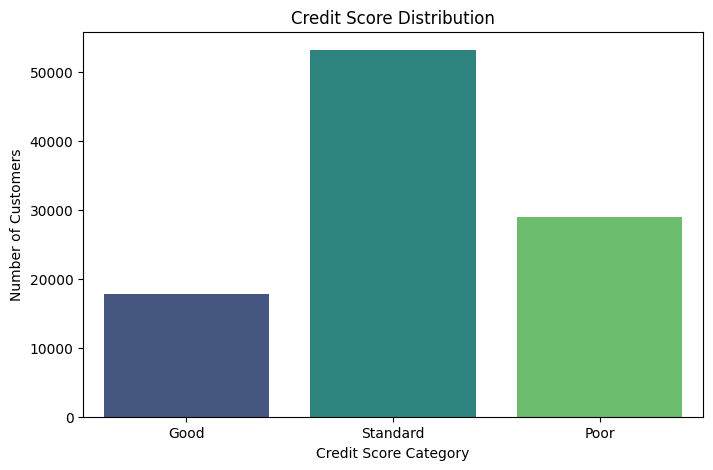

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Credit_Score', data=df, order=['Good', 'Standard', 'Poor'], palette='viridis')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score Category')
plt.ylabel('Number of Customers')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal to visualize categorical class counts, allowing easy comparison of volumes for each credit score category ("Good," "Standard," and "Poor"). It clearly shows imbalance or dominance in the dataset.

##### 2. What is/are the insight(s) found from the chart?

"Standard" credit scores constitute the majority of the dataset, outnumbering both "Good" and "Poor" classes significantly. This confirms a class imbalance issue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding this imbalance helps in designing mitigation strategies in model-building, such as resampling, class-weighting, or specialized algorithms to avoid bias toward the majority class. This leads to more accurate credit assessments and reduces financial risk.






#### Chart - 2 Histogram for age distribution

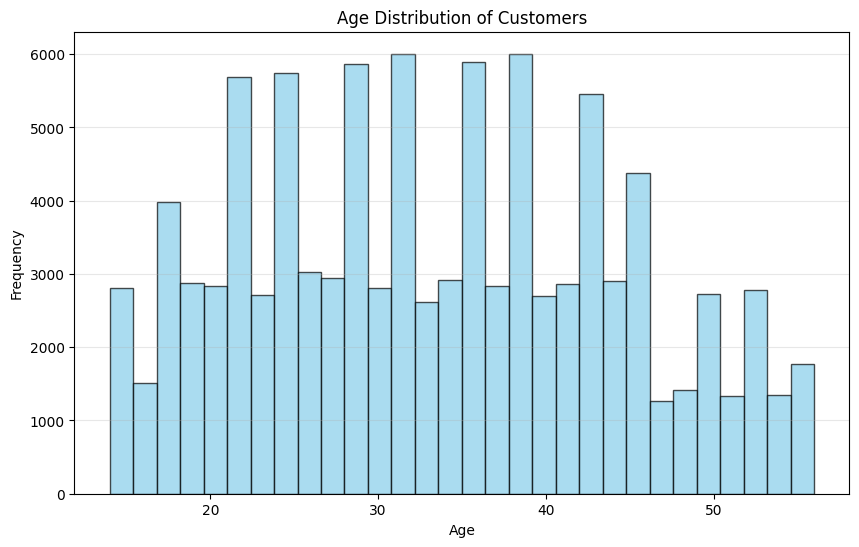

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)


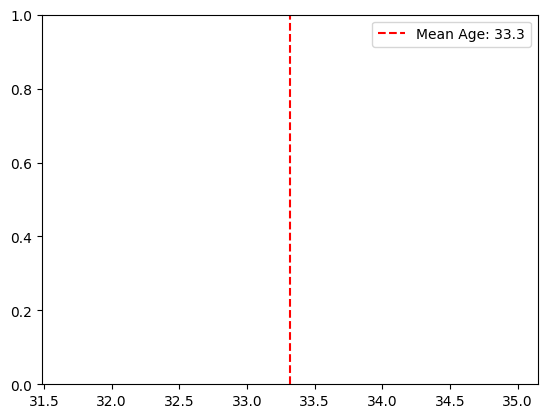

In [ ]:
mean_age = df['Age'].mean()
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean Age: {mean_age:.1f}')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is the most appropriate chart for displaying the distribution of a continuous numerical variable like age. It shows the frequency of different age ranges and reveals the shape of the distribution.

##### 2. What is/are the insight(s) found from the chart?

The age distribution shows customers are primarily concentrated in the 20-45 age range, with a mean age around 33.3 years. The distribution appears relatively normal with a slight right skew, indicating most customers are young to middle-aged adults in their prime earning years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the age demographics allows Paisabazaar to tailor marketing strategies and product offerings to the dominant age groups. Young adults (20-30) might be targeted for first-time credit products and financial education, while the 30-40 group could be offered investment and mortgage products. And this also implies that less less focus ios present inn the agge group of 45+ which could be loosing a potential market

#### Chart - 3 Histogram for annual income

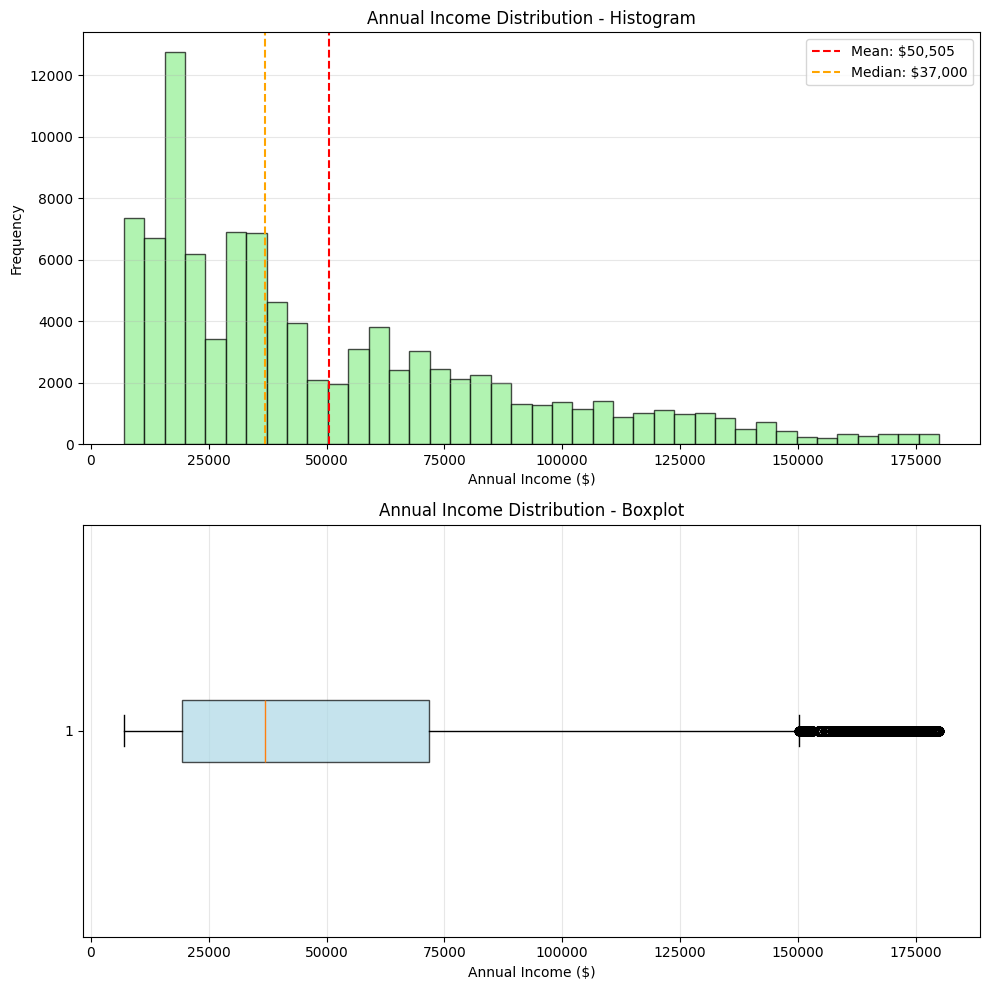

Income Statistics:
Min: $7,005.93
Max: $179,987.28
Mean: $50,505.12
Median: $36,999.71
Standard Deviation: $38,299.42


In [ ]:
# Create subplot with histogram and boxplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Histogram
ax1.hist(df['Annual_Income'], bins=40, edgecolor='black', alpha=0.7, color='lightgreen')
ax1.set_title('Annual Income Distribution - Histogram')
ax1.set_xlabel('Annual Income ($)')
ax1.set_ylabel('Frequency')
ax1.grid(axis='y', alpha=0.3)

# Add statistics
mean_income = df['Annual_Income'].mean()
median_income = df['Annual_Income'].median()
ax1.axvline(mean_income, color='red', linestyle='--', label=f'Mean: ${mean_income:,.0f}')
ax1.axvline(median_income, color='orange', linestyle='--', label=f'Median: ${median_income:,.0f}')
ax1.legend()

# Boxplot
ax2.boxplot(df['Annual_Income'], vert=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue', alpha=0.7))
ax2.set_title('Annual Income Distribution - Boxplot')
ax2.set_xlabel('Annual Income ($)')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Income Statistics:")
print(f"Min: ${df['Annual_Income'].min():,.2f}")
print(f"Max: ${df['Annual_Income'].max():,.2f}")
print(f"Mean: ${df['Annual_Income'].mean():,.2f}")
print(f"Median: ${df['Annual_Income'].median():,.2f}")
print(f"Standard Deviation: ${df['Annual_Income'].std():,.2f}")

##### 1. Why did you pick the specific chart?

Histogram shows income frequency distribution, boxplot shows outliers and quartiles. Together they give a complete view of income patterns.

##### 2. What is/are the insight(s) found from the chart?

Income is right-skewed with mean 50,505  but median only 36,999. Most customers earn 7K-37K, with some high earners up to 180K. Large income gap exists between customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. we can segment customers by income levels - offer basic products to low earners, premium services to high earners. This improves targeting and product fit.

Most customers are low-income (below median), which means higher risk and lower profits. Wide income range makes risk assessment difficult and could lead to wrong credit decisions.

#### Chart - 4 Credit Utilization Ratio Distribution - Histogram


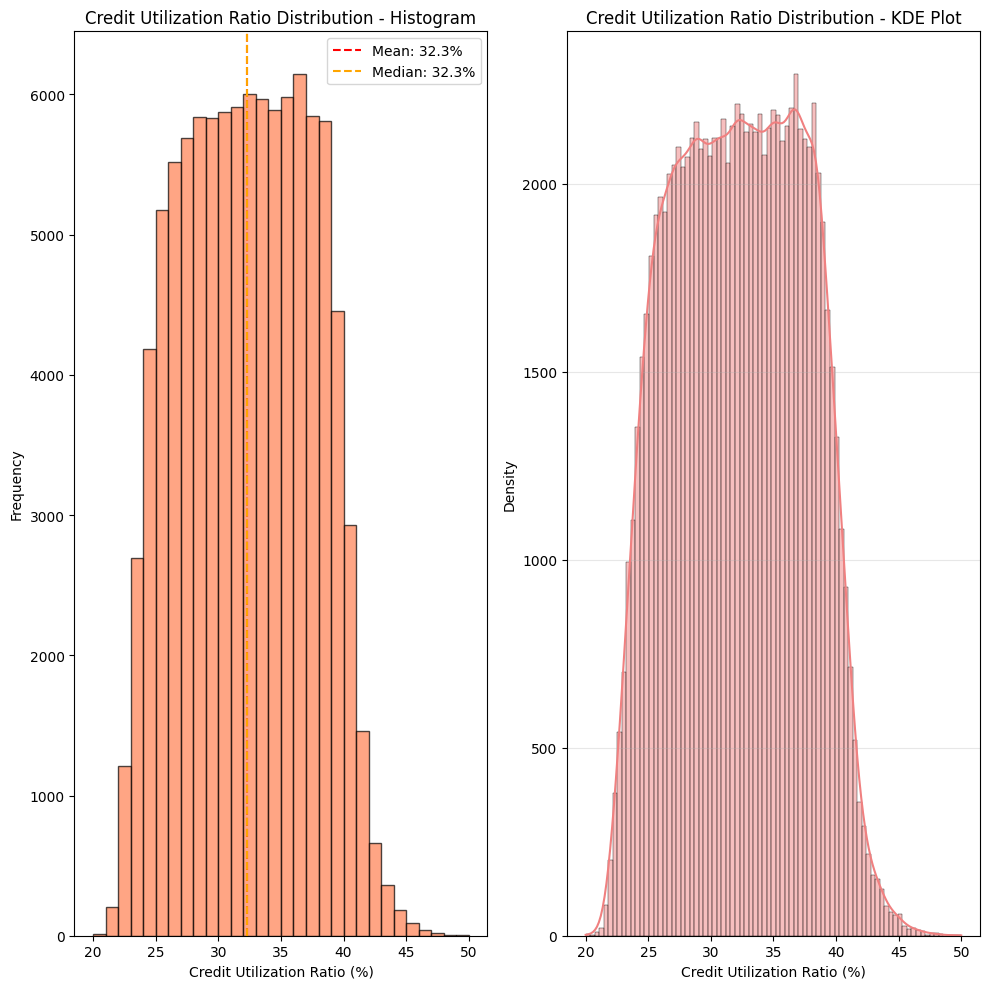

Credit Utilization Statistics:
Min: 20.0%
Max: 50.0%
Mean: 32.3%
Median: 32.3%
Standard Deviation: 5.1%


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

# Histogram
ax1.hist(df['Credit_Utilization_Ratio'], bins=30, edgecolor='black', alpha=0.7, color='coral')
ax1.set_title('Credit Utilization Ratio Distribution - Histogram')
ax1.set_xlabel('Credit Utilization Ratio (%)')
ax1.set_ylabel('Frequency')
#ax1.grid(axis='y', alpha=0.3)

# Add statistics
mean_util = df['Credit_Utilization_Ratio'].mean()
median_util = df['Credit_Utilization_Ratio'].median()
ax1.axvline(mean_util, color='red', linestyle='--', label=f'Mean: {mean_util:.1f}%')
ax1.axvline(median_util, color='orange', linestyle='--', label=f'Median: {median_util:.1f}%')
ax1.legend()

# KDE Plot
sns.histplot(df['Credit_Utilization_Ratio'], kde=True, ax=ax2, color='lightcoral')
ax2.set_title('Credit Utilization Ratio Distribution - KDE Plot')
ax2.set_xlabel('Credit Utilization Ratio (%)')
ax2.set_ylabel('Density')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Credit Utilization Statistics:")
print(f"Min: {df['Credit_Utilization_Ratio'].min():.1f}%")
print(f"Max: {df['Credit_Utilization_Ratio'].max():.1f}%")
print(f"Mean: {df['Credit_Utilization_Ratio'].mean():.1f}%")
print(f"Median: {df['Credit_Utilization_Ratio'].median():.1f}%")
print(f"Standard Deviation: {df['Credit_Utilization_Ratio'].std():.1f}%")

##### 1. Why did you pick the specific chart?

Histogram shows frequency distribution of utilization ratios, KDE plot shows smooth probability density. Together they reveal usage patterns and distribution shape clearly.

##### 2. What is/are the insight(s) found from the chart?

Credit utilization is normally distributed with mean and median both at 32.3%. Range is 20-50% with low standard deviation (5.1%), showing consistent usage patterns. Most customers maintain moderate utilization around 30-35%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The 30-35% utilization range is considered healthy by credit standards. This suggests a relatively low-risk customer base suitable for credit limit increases and additional products.
Some customers at the high end (45-50%) are approaching risky utilization levels, which could indicate financial stress. These customers may default if economic conditions worsen, requiring careful monitoring and intervention strategies.

#### Chart - 5 Monthly Balance Distribution - Boxplot

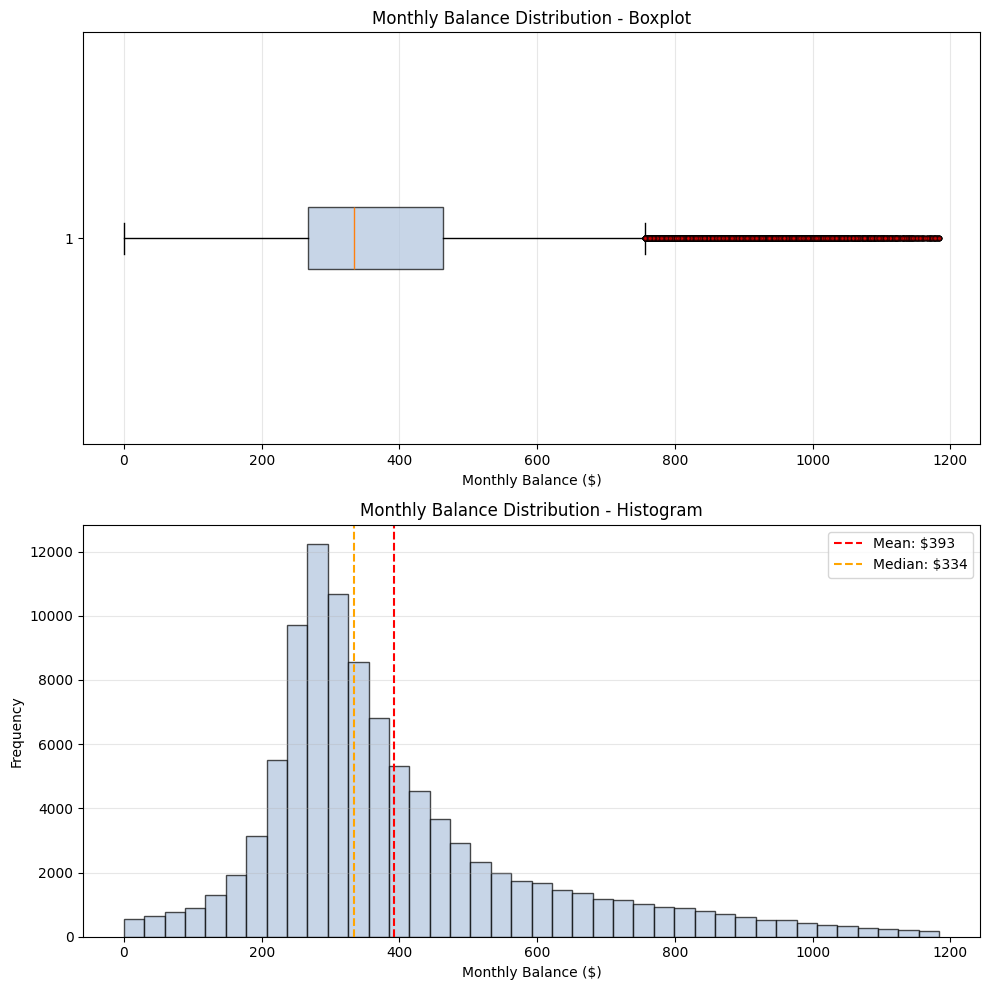

Monthly Balance Statistics:
Min: $0.01
Max: $1,183.93
Mean: $392.70
Median: $333.87
Standard Deviation: $201.65
25th Percentile: $267.62
75th Percentile: $463.22
Number of outliers: 7400


In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Boxplot
box_plot = ax1.boxplot(df['Monthly_Balance'], vert=False, patch_artist=True,
                       boxprops=dict(facecolor='lightsteelblue', alpha=0.7),
                       flierprops=dict(marker='o', markerfacecolor='red', markersize=3, alpha=0.5))
ax1.set_title('Monthly Balance Distribution - Boxplot')
ax1.set_xlabel('Monthly Balance ($)')
ax1.grid(axis='x', alpha=0.3)

# Histogram for additional context
ax2.hist(df['Monthly_Balance'], bins=40, edgecolor='black', alpha=0.7, color='lightsteelblue')
ax2.set_title('Monthly Balance Distribution - Histogram')
ax2.set_xlabel('Monthly Balance ($)')
ax2.set_ylabel('Frequency')
ax2.grid(axis='y', alpha=0.3)

# Add statistics
mean_balance = df['Monthly_Balance'].mean()
median_balance = df['Monthly_Balance'].median()
ax2.axvline(mean_balance, color='red', linestyle='--', label=f'Mean: ${mean_balance:,.0f}')
ax2.axvline(median_balance, color='orange', linestyle='--', label=f'Median: ${median_balance:,.0f}')
ax2.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Monthly Balance Statistics:")
print(f"Min: ${df['Monthly_Balance'].min():,.2f}")
print(f"Max: ${df['Monthly_Balance'].max():,.2f}")
print(f"Mean: ${df['Monthly_Balance'].mean():,.2f}")
print(f"Median: ${df['Monthly_Balance'].median():,.2f}")
print(f"Standard Deviation: ${df['Monthly_Balance'].std():,.2f}")
print(f"25th Percentile: ${df['Monthly_Balance'].quantile(0.25):,.2f}")
print(f"75th Percentile: ${df['Monthly_Balance'].quantile(0.75):,.2f}")

# Count outliers
Q1 = df['Monthly_Balance'].quantile(0.25)
Q3 = df['Monthly_Balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Monthly_Balance'] < lower_bound) | (df['Monthly_Balance'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


##### 1. Why did you pick the specific chart?

Boxplot effectively shows the spread, quartiles, median, and outliers of monthly balances. It identifies unusual balance patterns and the typical range customers maintain.

##### 2. What is/are the insight(s) found from the chart?

Monthly balances range from 0.01 to 1,183.93 with mean 392.70 and median 333.87. The distribution is right-skewed with 7,400 outliers, indicating some customers maintain unusually high or low balances compared to the typical 267-463 range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The 333 median suggests most customers have moderate savings capacity for additional products.
 The high number of outliers (7,400) suggests financial instability among many customers. Very low balances may indicate customers struggling financially, increasing default risk. Extreme outliers could skew risk models and lead to poor lending decisions.

#### Chart - 6 Occupation Distribution - Bar chart

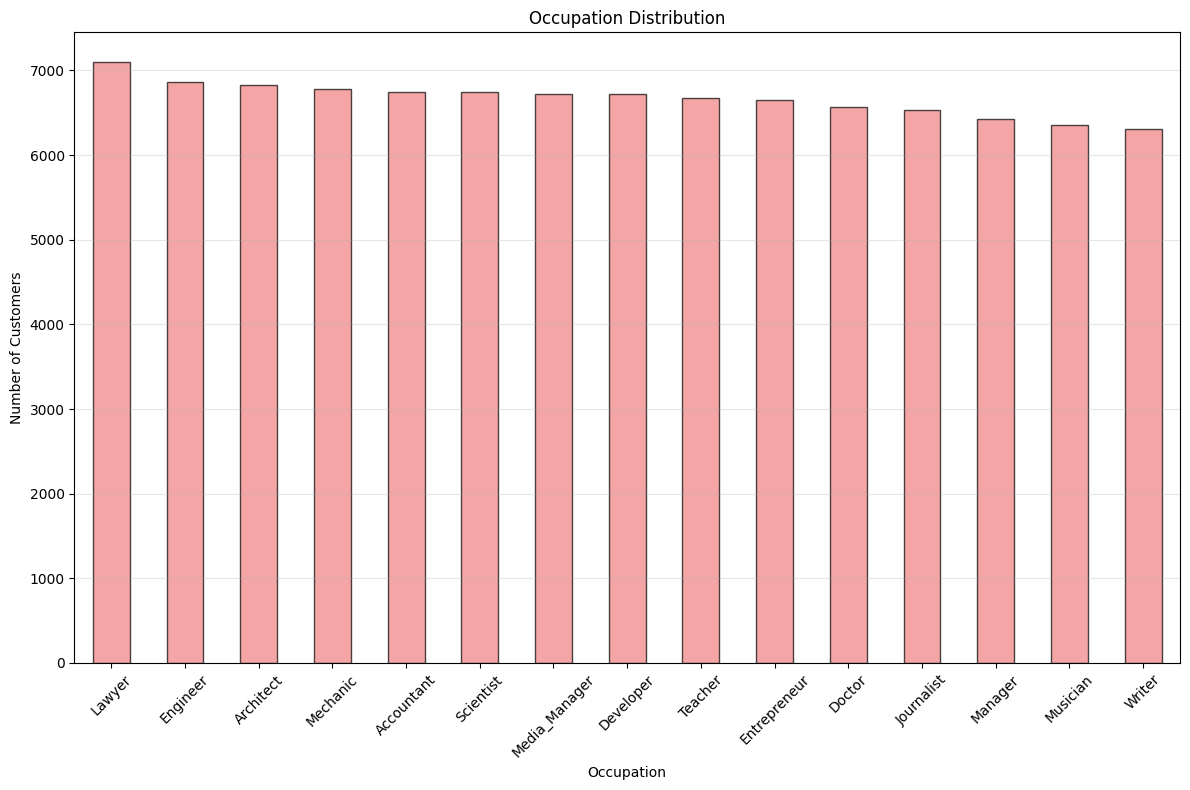

Occupation Distribution Statistics:
Total unique occupations: 15
Most common occupation : Lawyer (7096 customers)
Least common occupation : Writer (6304 customers)
Average customers per occupation: 6667
Standard deviation: 205

Top 5 Occupation Codes:
 Lawyer: 7096 customers
 Engineer: 6864 customers
 Architect: 6824 customers
 Mechanic: 6776 customers
 Accountant: 6744 customers

Bottom 5 Occupation Codes:
 Doctor: 6568 customers
 Journalist: 6536 customers
 Manager: 6432 customers
 Musician: 6352 customers
 Writer: 6304 customers


In [ ]:
plt.figure(figsize=(12, 8))

# Create bar chart of occupation counts
occupation_counts = df['Occupation'].value_counts().sort_values(ascending=False)
ax = occupation_counts.plot(kind='bar', color='lightcoral', edgecolor='black', alpha=0.7)

plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics
print(f"Occupation Distribution Statistics:")
print(f"Total unique occupations: {df['Occupation'].nunique()}")
print(f"Most common occupation : {occupation_counts.index[0]} ({occupation_counts.iloc[0]} customers)")
print(f"Least common occupation : {occupation_counts.index[-1]} ({occupation_counts.iloc[-1]} customers)")
print(f"Average customers per occupation: {occupation_counts.mean():.0f}")
print(f"Standard deviation: {occupation_counts.std():.0f}")

print(f"\nTop 5 Occupation Codes:")
for i in range(5):
    print(f" {occupation_counts.index[i]}: {occupation_counts.iloc[i]} customers")

print(f"\nBottom 5 Occupation Codes:")
for i in range(-5, 0):
    print(f" {occupation_counts.index[i]}: {occupation_counts.iloc[i]} customers")

##### 1. Why did you pick the specific chart?

A bar chart is ideal for showing discrete categories like occupations, allowing easy comparison of customer counts across occupation types.

##### 2. What is/are the insight(s) found from the chart?

There are 15 unique occupations with a fairly even distribution. "Lawyer" is the most common occupation with 7,096 customers, while "Writer" is the least common at 6,304. The average customers per occupation is about 6,667, and the counts are closely clustered, showing balanced representation.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, knowing the occupation distribution helps Paisabazaar tailor financial product offerings and marketing campaigns for prevalent professions, improving customer engagement and conversion.

While the distribution is balanced, an overreliance on specific occupations like lawyers or engineers could expose lending to sector-specific economic risks.

#### Chart - 7 Number of bank account - Histogram

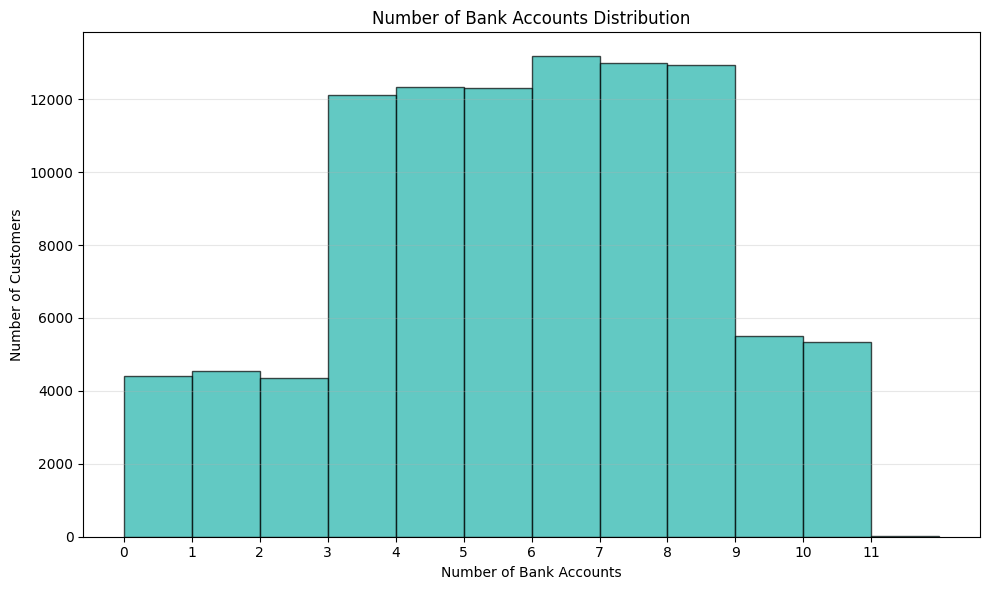

Number of Bank Accounts Distribution:
Num_Bank_Accounts
0.0      4417
1.0      4540
2.0      4340
3.0     12107
4.0     12343
5.0     12298
6.0     13175
7.0     12999
8.0     12940
9.0      5503
10.0     5329
11.0        9
Name: count, dtype: int64
Mean: 5.37
Median: 5.0
Min: 0.0
Max: 11.0


In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 6))
plt.hist(df['Num_Bank_Accounts'], bins=range(int(df['Num_Bank_Accounts'].min()), int(df['Num_Bank_Accounts'].max())+2),
         edgecolor='black', alpha=0.7, color='lightseagreen')
plt.title('Number of Bank Accounts Distribution')
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Number of Customers')
plt.xticks(range(int(df['Num_Bank_Accounts'].min()), int(df['Num_Bank_Accounts'].max())+1))
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary stats
counts = df['Num_Bank_Accounts'].value_counts().sort_index()
print("Number of Bank Accounts Distribution:")
print(counts)
print(f"Mean: {df['Num_Bank_Accounts'].mean():.2f}")
print(f"Median: {df['Num_Bank_Accounts'].median():.1f}")
print(f"Min: {df['Num_Bank_Accounts'].min()}")
print(f"Max: {df['Num_Bank_Accounts'].max()}")

##### 1. Why did you pick the specific chart?

A histogram is best to visualize the frequency distribution of a numeric discrete variable like the number of bank accounts per customer.

##### 2. What is/are the insight(s) found from the chart?

Most customers have between 3 and 8 bank accounts, with a mean of about 5.4 and median of 5 accounts. A sizeable group has zero to two accounts, while only a few customers have more than 10 accounts.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding account counts helps Paisabazaar tailor credit limits and product recommendations. Customers with few bank accounts may be new or less financially engaged and could benefit from credit-building products.

A notable number of customers have zero bank accounts, which may indicate underbanked individuals potentially excluded from financial products or higher-risk due to lack of banking history.

#### Chart - 8 Number of credit card - Histogram

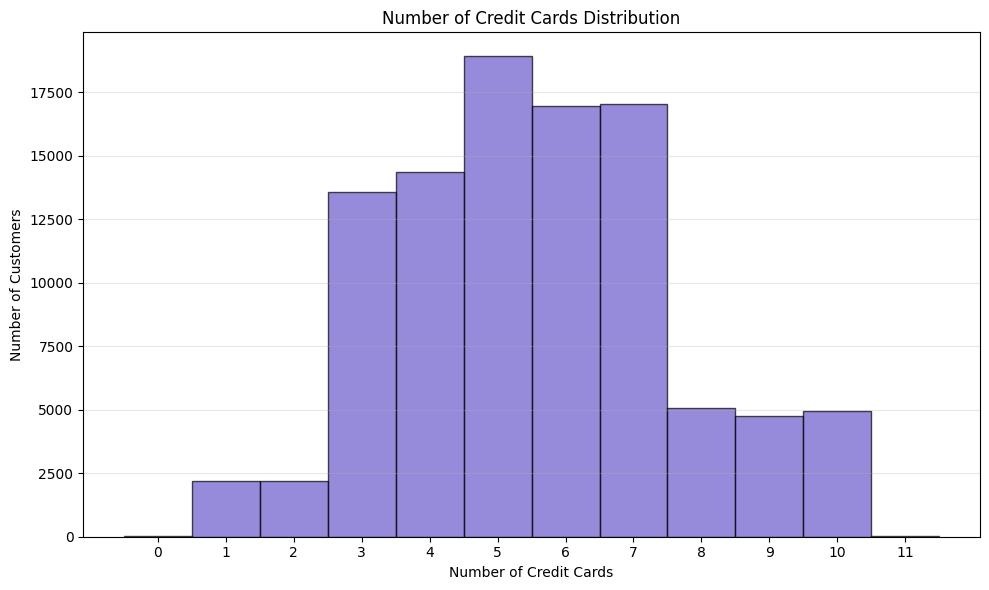

Number of Credit Cards Distribution:
Num_Credit_Card
0.0        14
1.0      2185
2.0      2196
3.0     13560
4.0     14362
5.0     18903
6.0     16932
7.0     17024
8.0      5073
9.0      4753
10.0     4962
11.0       36
Name: count, dtype: int64
Mean: 5.53
Median: 5.0
Min: 0.0
Max: 11.0


In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(df['Num_Credit_Card'], bins=range(int(df['Num_Credit_Card'].min()), int(df['Num_Credit_Card'].max())+2),
         edgecolor='black', alpha=0.7, color='slateblue', align='left')
plt.title('Number of Credit Cards Distribution')
plt.xlabel('Number of Credit Cards')
plt.ylabel('Number of Customers')
plt.xticks(range(int(df['Num_Credit_Card'].min()), int(df['Num_Credit_Card'].max())+1))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary stats
counts = df['Num_Credit_Card'].value_counts().sort_index()
print("Number of Credit Cards Distribution:")
print(counts)
print(f"Mean: {df['Num_Credit_Card'].mean():.2f}")
print(f"Median: {df['Num_Credit_Card'].median():.1f}")
print(f"Min: {df['Num_Credit_Card'].min()}")
print(f"Max: {df['Num_Credit_Card'].max()}")


##### 1. Why did you pick the specific chart?

A histogram is suitable for showing how many customers fall into each discrete category of credit card counts.

##### 2. What is/are the insight(s) found from the chart?

Most customers have between 3 and 7 credit cards, with an average of about 5.5 cards and a median of 5. Only a few customers have no cards or more than 10 cards.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding this distribution can help Paisabazaar recommend appropriate credit products and limits.

Customers with too many credit cards (close to or above 10) may be at a higher risk of overextension and potential default.

#### Chart - 9 Payment Behaviour - Barplot

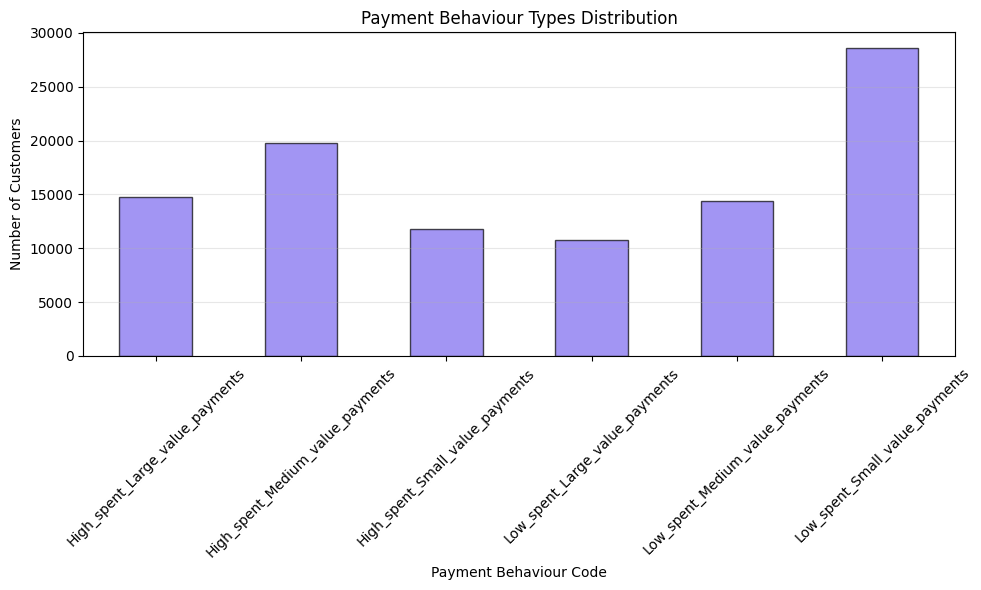

Payment Behaviour Types Distribution:
Payment_Behaviour
High_spent_Large_value_payments     14726
High_spent_Medium_value_payments    19738
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Low_spent_Medium_value_payments     14399
Low_spent_Small_value_payments      28616
Name: count, dtype: int64
Total unique payment types: 6


In [ ]:
plt.figure(figsize=(10, 6))
payment_counts = df['Payment_Behaviour'].value_counts().sort_index()

# Plot bar chart
ax = payment_counts.plot(kind='bar', color='mediumslateblue', edgecolor='black', alpha=0.7)
plt.title('Payment Behaviour Types Distribution')
plt.xlabel('Payment Behaviour Code')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics
print("Payment Behaviour Types Distribution:")
print(payment_counts)
print(f"Total unique payment types: {df['Payment_Behaviour'].nunique()}")


##### 1. Why did you pick the specific chart?

A bar chart is perfect for displaying the count of each categorical payment behavior type, making it easy to compare their popularity.

##### 2. What is/are the insight(s) found from the chart?

There are 6 distinct payment behavior types. The most common type is code 5 with 28,616 customers, followed by type 1 with 19,738 customers. The least common is type 3 with 10,757 customers. This shows diverse payment habits among customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Different payment behaviors indicate varying credit risk profiles. Paisabazaar can use this to customize credit products, risk assessment, and collection strategies for each behavior type, improving overall portfolio quality.

The existence of multiple behavior types with significant size suggests heterogeneity, which if not modeled properly, can lead to inaccurate credit scoring and underestimated risk for some groups, potentially causing losses.

#### Chart - 10 Delay from due date - Histogram

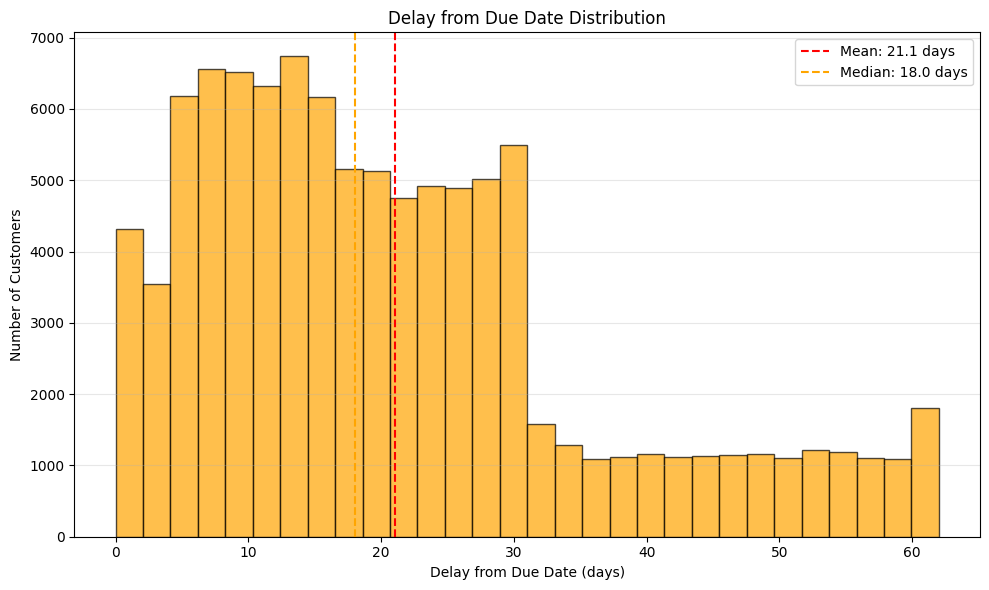

Delay from Due Date Statistics:
Min: 0.0 days
Max: 62.0 days
Mean: 21.1 days
Median: 18.0 days
Standard Deviation: 14.8 days

Delay Categories:
No delay (0 days): 1385 customers (1.4%)
Short delay (1-7 days): 15890 customers (15.9%)
Medium delay (8-30 days): 63617 customers (63.6%)
Long delay (>30 days): 19108 customers (19.1%)


In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Delay_from_due_date'], bins=30, edgecolor='black', alpha=0.7, color='orange')
plt.title('Delay from Due Date Distribution')
plt.xlabel('Delay from Due Date (days)')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.3)

# Add statistics
mean_delay = df['Delay_from_due_date'].mean()
median_delay = df['Delay_from_due_date'].median()
plt.axvline(mean_delay, color='red', linestyle='--', label=f'Mean: {mean_delay:.1f} days')
plt.axvline(median_delay, color='orange', linestyle='--', label=f'Median: {median_delay:.1f} days')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Delay from Due Date Statistics:")
print(f"Min: {df['Delay_from_due_date'].min():.1f} days")
print(f"Max: {df['Delay_from_due_date'].max():.1f} days")
print(f"Mean: {df['Delay_from_due_date'].mean():.1f} days")
print(f"Median: {df['Delay_from_due_date'].median():.1f} days")
print(f"Standard Deviation: {df['Delay_from_due_date'].std():.1f} days")

# Check percentage of customers with different delay ranges
no_delay = len(df[df['Delay_from_due_date'] == 0])
short_delay = len(df[(df['Delay_from_due_date'] > 0) & (df['Delay_from_due_date'] <= 7)])
medium_delay = len(df[(df['Delay_from_due_date'] > 7) & (df['Delay_from_due_date'] <= 30)])
long_delay = len(df[df['Delay_from_due_date'] > 30])

print(f"\nDelay Categories:")
print(f"No delay (0 days): {no_delay} customers ({no_delay/len(df)*100:.1f}%)")
print(f"Short delay (1-7 days): {short_delay} customers ({short_delay/len(df)*100:.1f}%)")
print(f"Medium delay (8-30 days): {medium_delay} customers ({medium_delay/len(df)*100:.1f}%)")
print(f"Long delay (>30 days): {long_delay} customers ({long_delay/len(df)*100:.1f}%)")

##### 1. Why did you pick the specific chart?

A histogram effectively shows the distribution of payment delays, revealing patterns of customer payment behavior and timeliness.



##### 2. What is/are the insight(s) found from the chart?

Most customers (63.6%) have medium delays of 8-30 days with a mean delay of 21.1 days. Only 1.4% pay on time, while 19.1% have long delays over 30 days. This indicates widespread payment delay issues across the customer base.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The delay patterns help identify risk segments and design intervention strategies. Customers with consistent medium delays could receive payment reminders, while those with long delays need special attention to prevent defaults.

 The high percentage of customers with delays (98.6%) and significant portion with long delays (19.1%) indicates poor payment discipline, which increases credit risk and potential losses.

#### Chart - 11 Loan Type frequency - Barchat

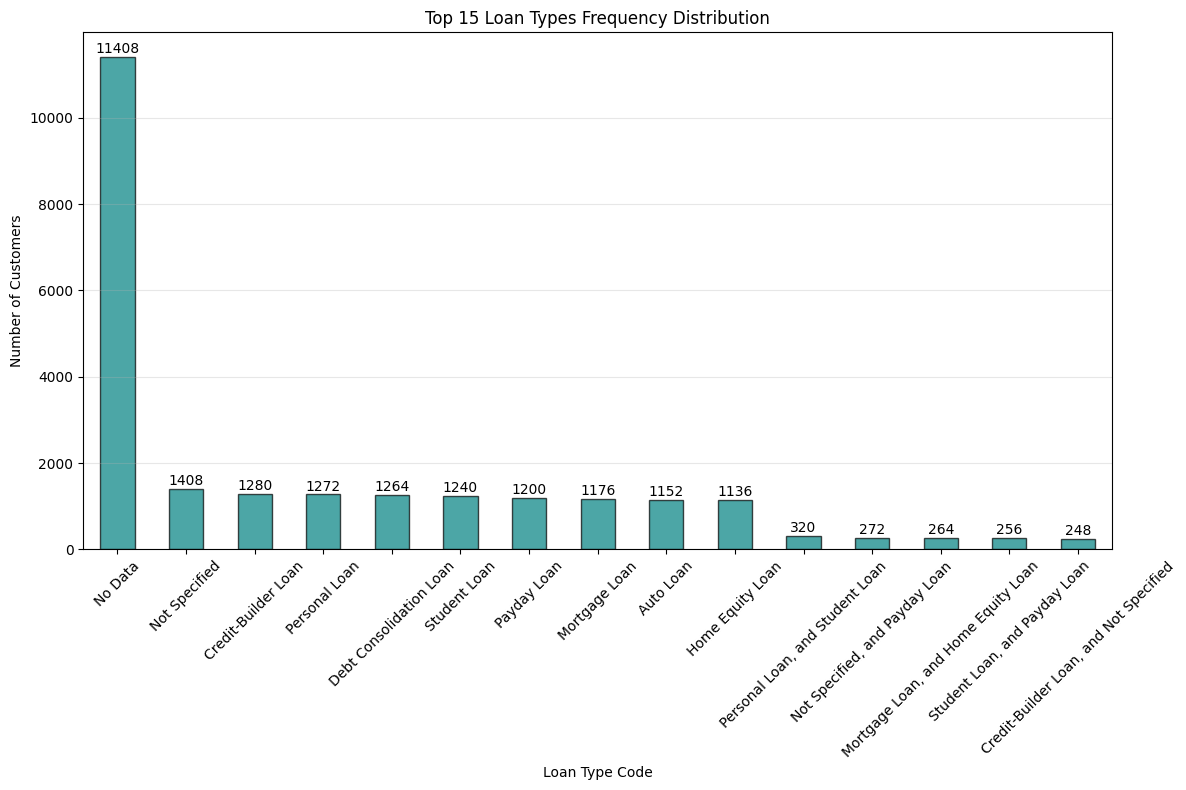

Loan Type Statistics:
Total unique loan types: 6261
Most common loan type:  No Data (11408 customers)
Least common loan type:  Payday Loan, Student Loan, Credit-Builder Loan, Mortgage Loan, and Auto Loan (8 customers)
Average customers per loan type: 16.0

Top 10 Loan Type:
 No Data: 11408 customers
 Not Specified: 1408 customers
 Credit-Builder Loan: 1280 customers
 Personal Loan: 1272 customers
 Debt Consolidation Loan: 1264 customers
 Student Loan: 1240 customers
 Payday Loan: 1200 customers
 Mortgage Loan: 1176 customers
 Auto Loan: 1152 customers
 Home Equity Loan: 1136 customers

Bottom 5 Loan Type
 Debt Consolidation Loan, Auto Loan, Personal Loan, Debt Consolidation Loan, Student Loan, and Credit-Builder Loan: 8 customers
 Student Loan, Auto Loan, Student Loan, Credit-Builder Loan, Home Equity Loan, Debt Consolidation Loan, and Debt Consolidation Loan: 8 customers
 Debt Consolidation Loan, Personal Loan, Mortgage Loan, Personal Loan, Not Specified, Mortgage Loan, and Home Equit

In [ ]:
plt.figure(figsize=(12, 8))

# Get loan type counts
loan_counts = df['Type_of_Loan'].value_counts()

# Since there are many loan types, show only top 15 most frequent
top_loans = loan_counts.head(15)

ax = top_loans.plot(kind='bar', color='teal', edgecolor='black', alpha=0.7)
plt.title('Top 15 Loan Types Frequency Distribution')
plt.xlabel('Loan Type Code')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(top_loans.values):
    ax.text(i, v + 20, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print statistics
print(f"Loan Type Statistics:")
print(f"Total unique loan types: {df['Type_of_Loan'].nunique()}")
print(f"Most common loan type:  {loan_counts.index[0]} ({loan_counts.iloc[0]} customers)")
print(f"Least common loan type:  {loan_counts.index[-1]} ({loan_counts.iloc[-1]} customers)")
print(f"Average customers per loan type: {loan_counts.mean():.1f}")

print(f"\nTop 10 Loan Type:")
for i in range(10):
    print(f" {loan_counts.index[i]}: {loan_counts.iloc[i]} customers")

print(f"\nBottom 5 Loan Type")
for i in range(-5, 0):
    print(f" {loan_counts.index[i]}: {loan_counts.iloc[i]} customers")

##### 1. Why did you pick the specific chart?

A bar chart effectively displays the frequency of different loan types, making it easy to identify the most and least common loan products.

##### 2. What is/are the insight(s) found from the chart?

There are 6,261 unique loan type combinations with "No Data" being most common (11,408 customers). Standard loan types like Personal Loan (1,272), Auto Loan (1,152), and Mortgage Loan (1,176) have moderate representation. Many customers have complex loan combinations, creating a highly fragmented loan portfolio.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Understanding loan preferences helps Paisabazaar focus on popular products like Personal and Auto loans. The high "No Data" category suggests opportunities to capture more loan information for better risk assessment and targeted marketing.
 The massive fragmentation (6,261 types) and high "No Data" entries (11,408) indicate poor data quality and complexity in loan categorization. This makes risk modeling difficult and could lead to inaccurate credit assessments.

#### Chart - 12 Outstanding Debt vs Credit Score - Box plot

/tmp/ipython-input-2412780618.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score_encoded', y='Outstanding_Debt', data=df, palette='viridis')


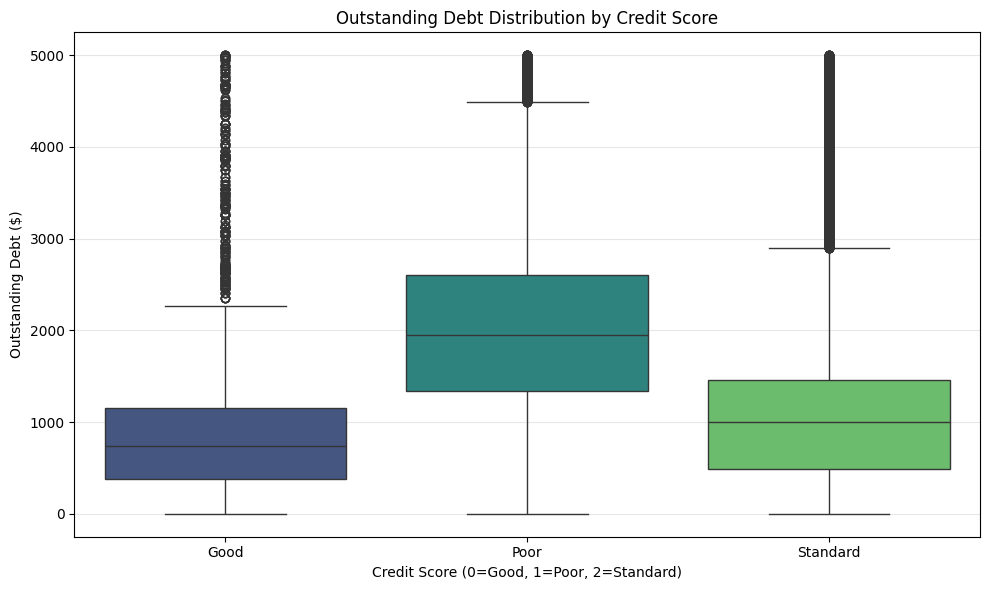

Outstanding Debt Statistics by Credit Score:

Good Credit Score (Code 0):
  Count: 17828
  Mean: $801.26
  Median: $736.47
  Min: $0.23
  Max: $4,998.07
  Std Dev: $612.36

Poor Credit Score (Code 1):
  Count: 28998
  Mean: $2,081.47
  Median: $1,945.35
  Min: $0.54
  Max: $4,997.10
  Std Dev: $1,143.98

Standard Credit Score (Code 2):
  Count: 53174
  Mean: $1,278.42
  Median: $1,001.61
  Min: $0.23
  Max: $4,998.07
  Std Dev: $1,132.71


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Score_encoded', y='Outstanding_Debt', data=df, palette='viridis')
plt.title('Outstanding Debt Distribution by Credit Score')
plt.xlabel('Credit Score (0=Good, 1=Poor, 2=Standard)')
plt.ylabel('Outstanding Debt ($)')
plt.grid(axis='y', alpha=0.3)

# Add labels for credit score categories
credit_labels = ['Good', 'Poor', 'Standard']
plt.xticks(range(3), credit_labels)

plt.tight_layout()
plt.show()

# Print summary statistics by credit score
print("Outstanding Debt Statistics by Credit Score:")
for score in [0, 1, 2]:
    score_data = df[df['Credit_Score_encoded'] == score]['Outstanding_Debt']
    score_name = ['Good', 'Poor', 'Standard'][score]
    print(f"\n{score_name} Credit Score (Code {score}):")
    print(f"  Count: {len(score_data)}")
    print(f"  Mean: ${score_data.mean():,.2f}")
    print(f"  Median: ${score_data.median():,.2f}")
    print(f"  Min: ${score_data.min():,.2f}")
    print(f"  Max: ${score_data.max():,.2f}")
    print(f"  Std Dev: ${score_data.std():,.2f}")

##### 1. Why did you pick the specific chart?

A boxplot effectively compares debt distributions across different credit score categories, showing medians, quartiles, and outliers for each group.

##### 2. What is/are the insight(s) found from the chart?

Clear relationship between credit score and debt levels: Good credit customers have lowest debt (mean 801), Poor credit customers have highest debt (mean 2,081), and Standard credit customers fall in between (mean 1,278). This confirms that higher debt correlates with lower credit scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This validates debt-to-credit-score relationships for risk modeling.

Poor credit customers have very high debt levels ($2,081 average) with high variability, indicating significant default risk.

#### Chart - 13 Credit mix distribution - Pie chart and bar plot

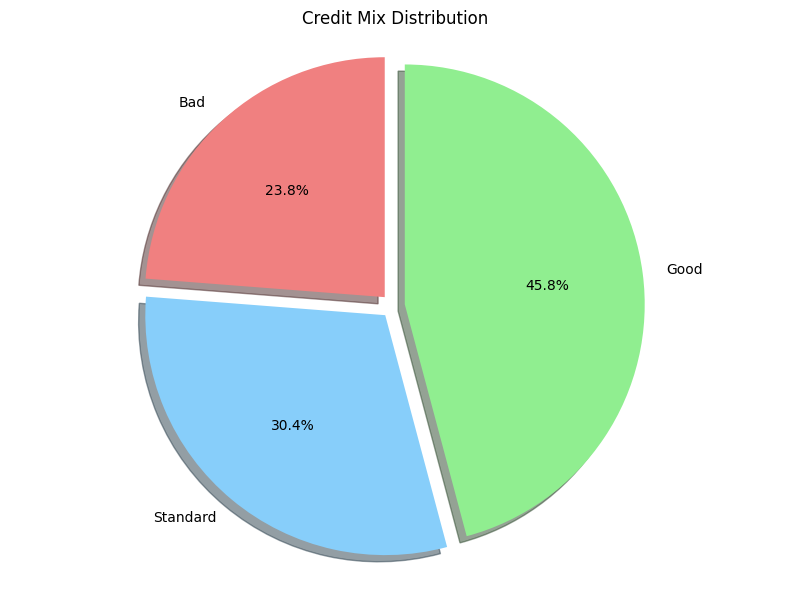

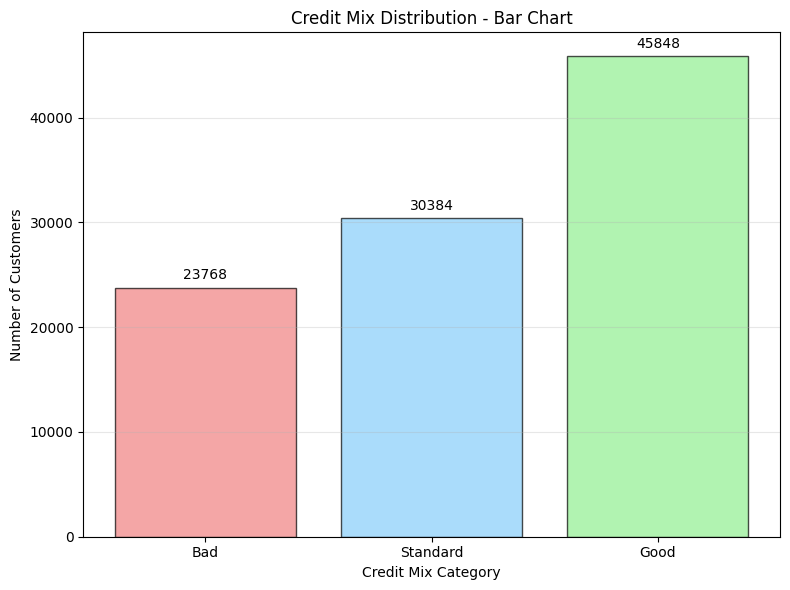

Credit Mix Distribution:
Bad (Code 0): 23768 customers (23.8%)
Standard (Code 1): 30384 customers (30.4%)
Good (Code 2): 45848 customers (45.8%)

Total customers: 100000


In [ ]:
plt.figure(figsize=(8, 6))

# Get credit mix counts
credit_mix_counts = df['Credit_Mix_encoded'].value_counts().sort_index()

# Create pie chart
labels = ['Bad', 'Standard', 'Good']
colors = ['lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.05, 0.05, 0.05)  # slightly separate slices

plt.pie(credit_mix_counts.values, labels=labels, autopct='%1.1f%%',
        colors=colors, explode=explode, shadow=True, startangle=90)
plt.title('Credit Mix Distribution')
plt.axis('equal')

plt.tight_layout()
plt.show()

# Also create a bar chart for better comparison
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, credit_mix_counts.values, color=colors, edgecolor='black', alpha=0.7)
plt.title('Credit Mix Distribution - Bar Chart')
plt.xlabel('Credit Mix Category')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, count in zip(bars, credit_mix_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
             str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print statistics
print("Credit Mix Distribution:")
for i, label in enumerate(['Bad', 'Standard', 'Good']):
    count = credit_mix_counts.iloc[i]
    percentage = (count / len(df)) * 100
    print(f"{label} (Code {i}): {count} customers ({percentage:.1f}%)")

print(f"\nTotal customers: {len(df)}")

##### 1. Why did you pick the specific chart?

A pie chart and bar chart combination effectively shows the proportion of customers in each credit mix category, making it easy to visualize the overall portfolio composition.

##### 2. What is/are the insight(s) found from the chart?

Nearly half the customers (45.8%) have a "Good" credit mix, 30.4% have "Standard" credit mix, and 23.8% have "Bad" credit mix. This shows a relatively healthy portfolio with more customers having good credit diversity than poor credit mix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The large portion of customers with good credit mix (45.8%) represents a low-risk, profitable segment for premium products. The 23.8% with bad credit mix can be targeted for credit improvement programs and diversification products to enhance their credit profile.

#### Chart - 14 - Correlation Heatmap

Numeric columns for correlation: ['ID', 'Customer_ID', 'Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Occupation_encoded', 'Type_of_Loan_encoded', 'Credit_Mix_encoded', 'Payment_of_Min_Amount_encoded', 'Payment_Behaviour_encoded', 'Credit_Score_encoded']


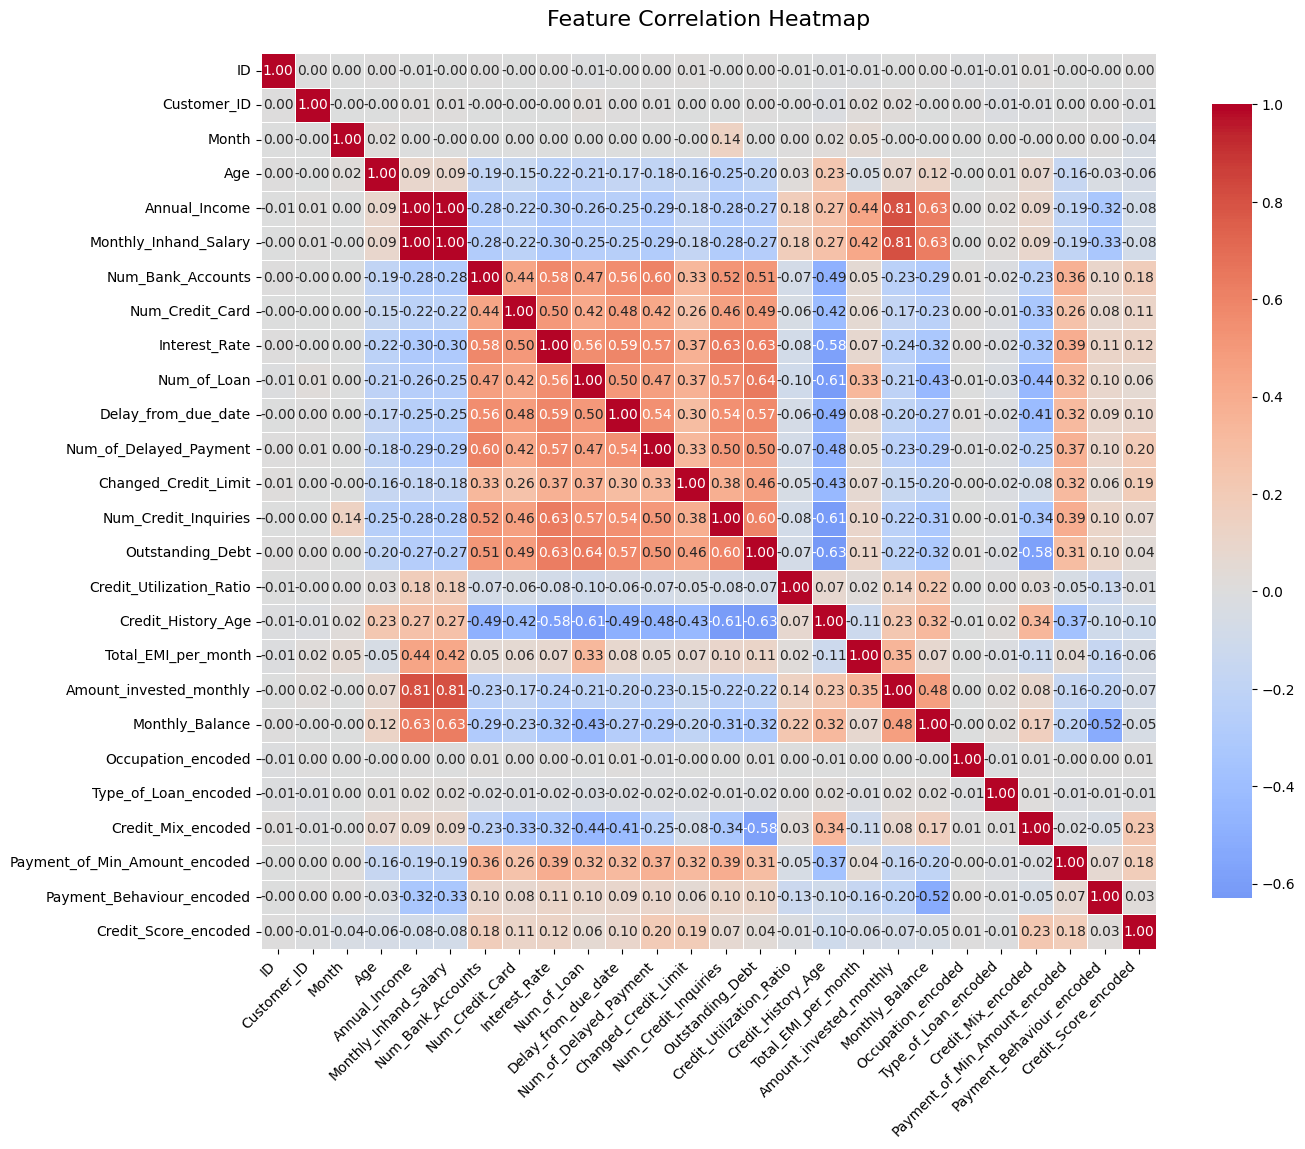


Strongest Correlations:
1. Annual_Income vs Monthly_Inhand_Salary: 0.998
2. Monthly_Inhand_Salary vs Amount_invested_monthly: 0.807
3. Annual_Income vs Amount_invested_monthly: 0.806
4. Num_of_Loan vs Outstanding_Debt: 0.639
5. Interest_Rate vs Num_Credit_Inquiries: 0.633
6. Interest_Rate vs Outstanding_Debt: 0.629
7. Outstanding_Debt vs Credit_History_Age: -0.629
8. Monthly_Inhand_Salary vs Monthly_Balance: 0.627
9. Annual_Income vs Monthly_Balance: 0.626
10. Num_Credit_Inquiries vs Credit_History_Age: -0.610

Weakest Correlations:
321. Month vs Type_of_Loan_encoded: 0.000
322. Customer_ID vs Month: -0.000
323. Month vs Outstanding_Debt: 0.000
324. Month vs Annual_Income: 0.000
325. Month vs Interest_Rate: 0.000


In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numeric columns for correlation: {list(numeric_cols)}")

plt.figure(figsize=(14, 12))

# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Create heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})

plt.title('Feature Correlation Heatmap', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find strongest correlations (excluding diagonal)
correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        correlation_pairs.append({
            'Feature1': correlation_matrix.columns[i],
            'Feature2': correlation_matrix.columns[j],
            'Correlation': corr_value
        })

# Sort by absolute correlation value
correlation_pairs = sorted(correlation_pairs, key=lambda x: abs(x['Correlation']), reverse=True)

print("\nStrongest Correlations:")
for i, pair in enumerate(correlation_pairs[:10]):
    print(f"{i+1}. {pair['Feature1']} vs {pair['Feature2']}: {pair['Correlation']:.3f}")

print("\nWeakest Correlations:")
for i, pair in enumerate(correlation_pairs[-5:]):
    print(f"{len(correlation_pairs)-4+i}. {pair['Feature1']} vs {pair['Feature2']}: {pair['Correlation']:.3f}")

##### 1. Why did you pick the specific chart?

A correlation heatmap visualizes relationships between all numeric features simultaneously, revealing which variables are strongly related and could impact credit scoring models.

##### 2. What is/are the insight(s) found from the chart?

Strong positive correlations exist between income and salary (0.998), salary and investments (0.807), and loans and debt (0.639). Key negative correlations include debt vs credit history (-0.629) and credit inquiries vs credit history (-0.610). These relationships make business sense and validate data quality.


#### Chart - 15 - Pair Plot

<Figure size 1500x1200 with 0 Axes>

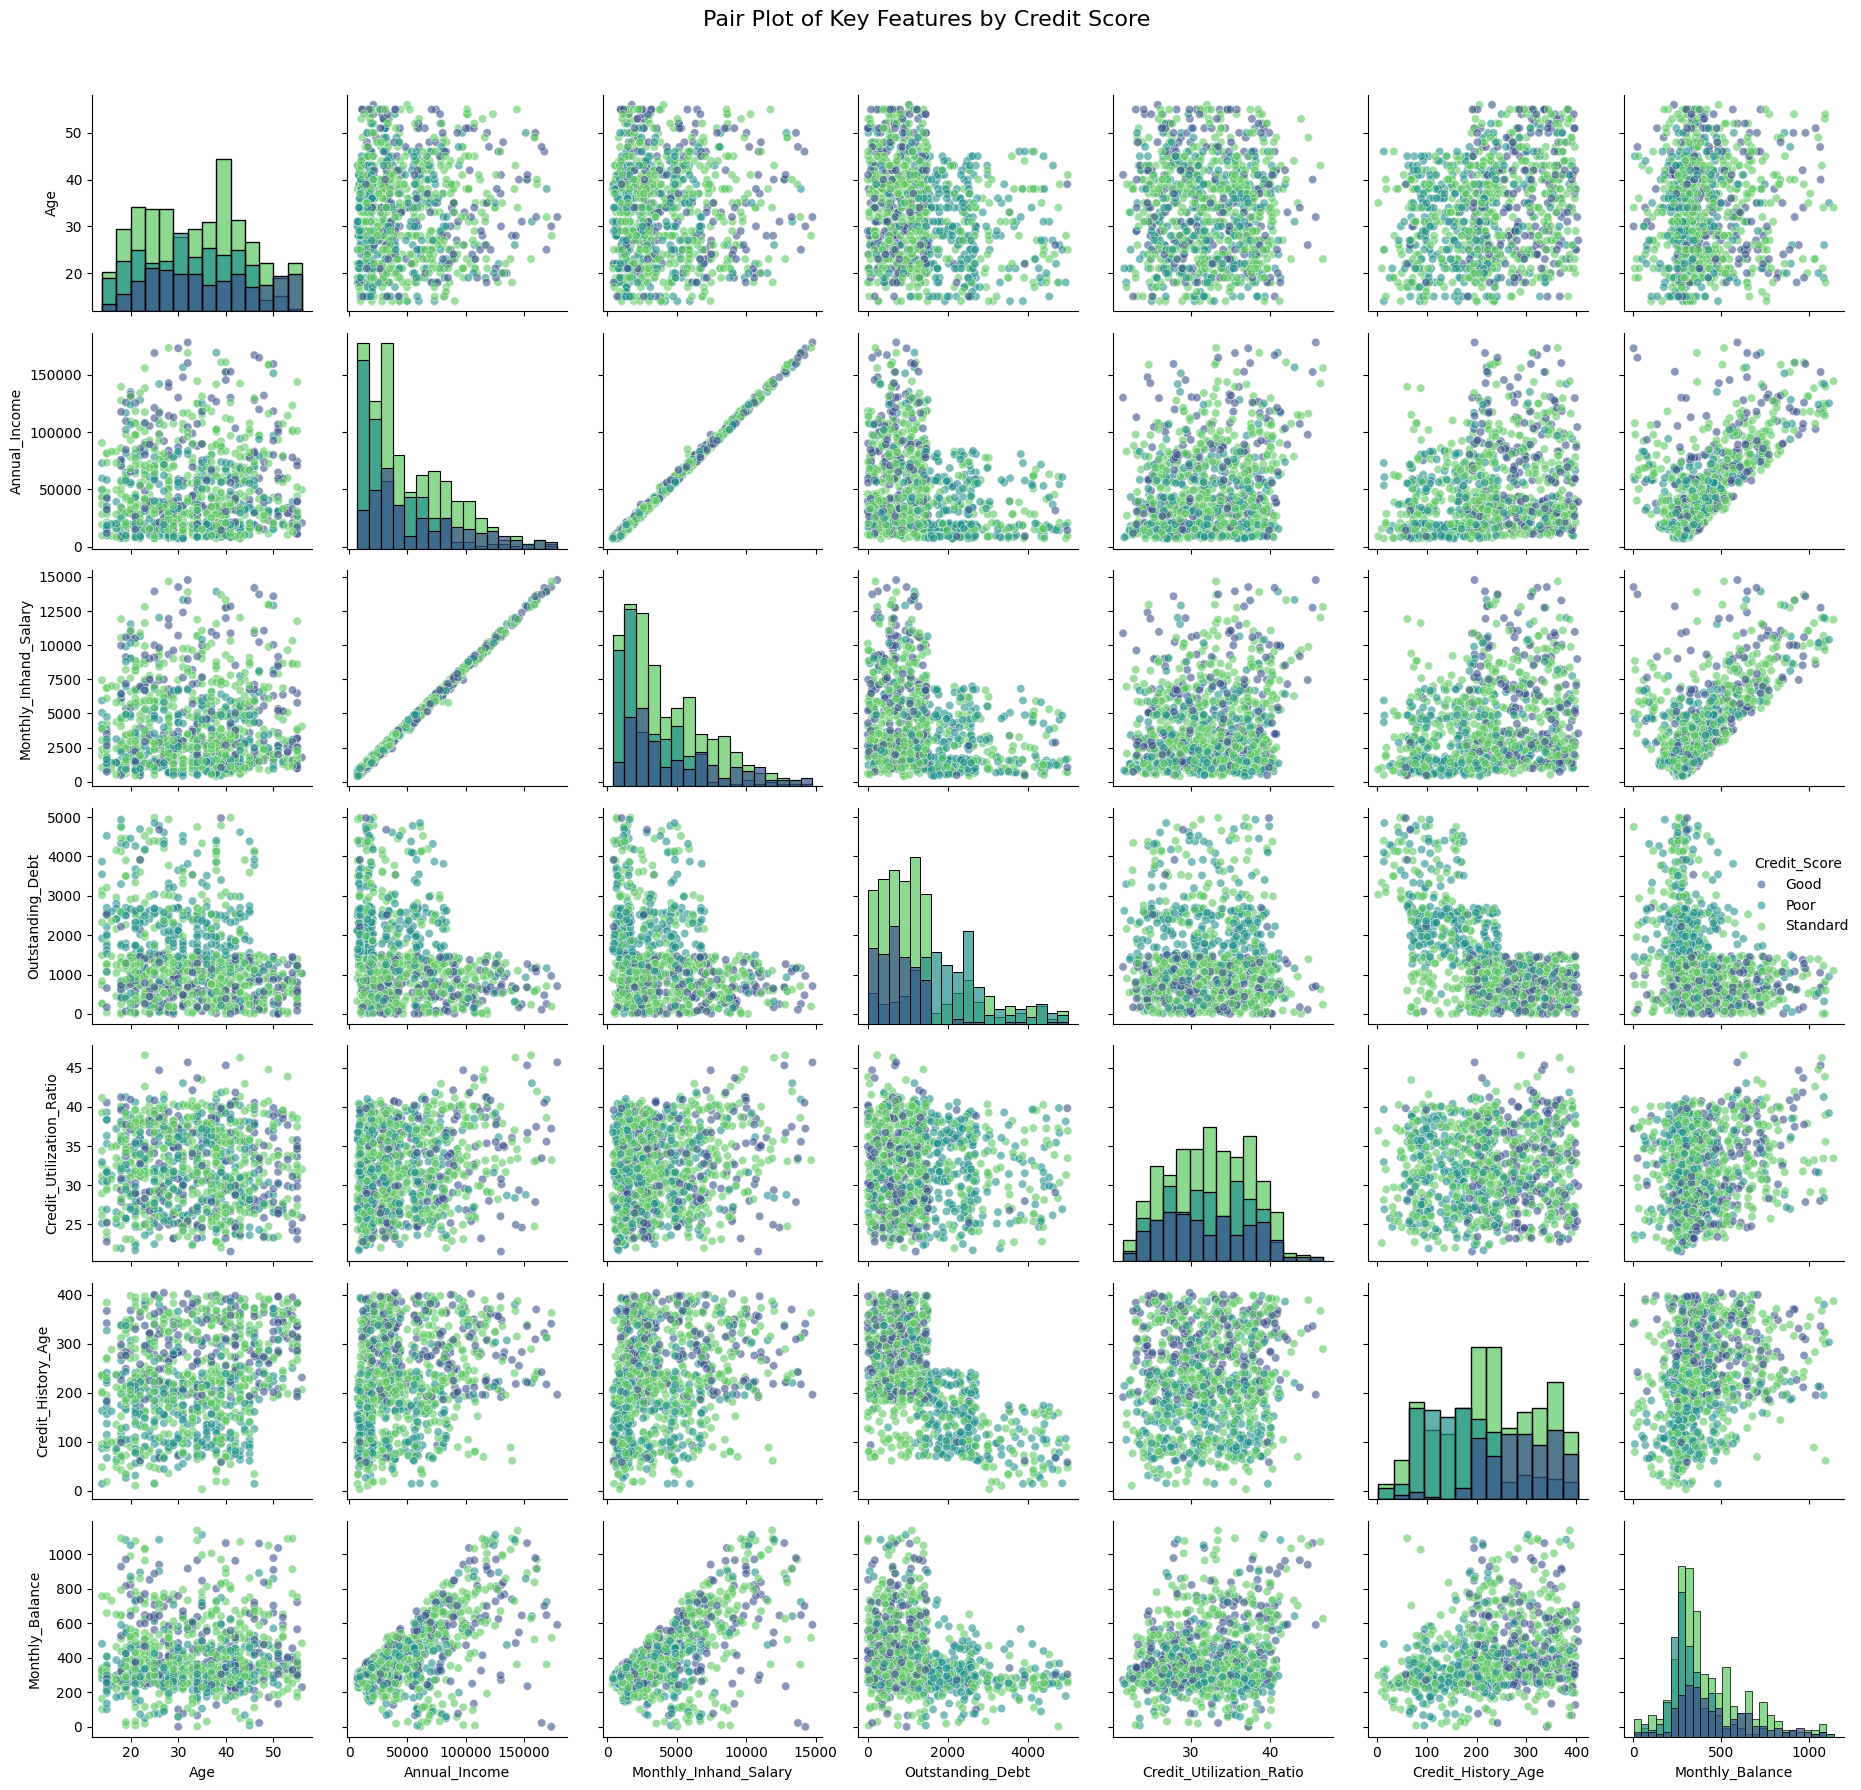

<Figure size 1200x1000 with 0 Axes>

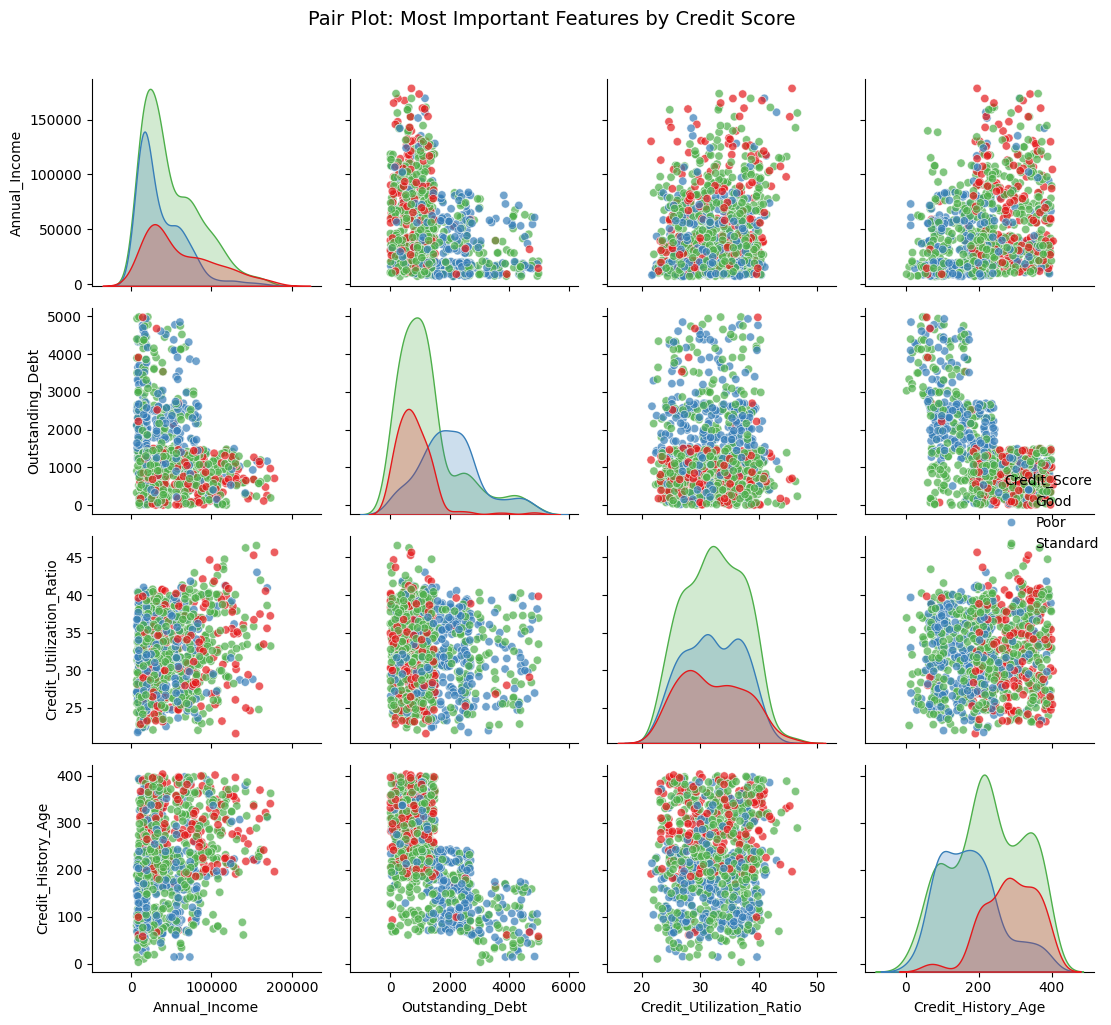

In [ ]:
df = df.sample(n=1000, random_state=42)

key_features = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
               'Outstanding_Debt', 'Credit_Utilization_Ratio',
               'Credit_History_Age', 'Monthly_Balance']

# Create subset with key features and target variable
plot_data = df[key_features + ['Credit_Score']].copy()

# Create pair plot
plt.figure(figsize=(15, 12))

sns.pairplot(plot_data,
             hue='Credit_Score',
             palette='viridis',
             diag_kind='hist',
             plot_kws={'alpha': 0.6},
             diag_kws={'alpha': 0.7})

plt.suptitle('Pair Plot of Key Features by Credit Score', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Alternative: Smaller pair plot with most important features
important_features = ['Annual_Income', 'Outstanding_Debt',
                     'Credit_Utilization_Ratio', 'Credit_History_Age']

plt.figure(figsize=(12, 10))
sns.pairplot(df[important_features + ['Credit_Score']],
             hue='Credit_Score',
             palette='Set1',
             diag_kind='kde',
             plot_kws={'alpha': 0.7})

plt.suptitle('Pair Plot: Most Important Features by Credit Score', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot shows relationships between multiple numerical features simultaneously, revealing clustering patterns by credit score categories and feature interactions that single plots cannot capture.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The pair plot shows that customers with different credit scores form separate groups. Good credit customers have lower debt and better payment patterns. Poor credit customers have higher debt and worse financial habits. Income and debt are strongly connected - higher income usually means higher debt too.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀: Poor credit customers do NOT have higher debt than good credit customers

H₁: Poor credit customers DO have higher debt than good credit customers

#### 2. Perform an appropriate statistical test.

DESCRIPTIVE STATISTICS:
Good Credit Customers (n=197):
  Mean: $821.00
  Std:  $697.65

Poor Credit Customers (n=289):
  Mean: $2029.92
  Std:  $1072.92

ASSUMPTION CHECKS:
1. Independence: (Different customers)
2. Sample size: (Large samples > 1000)
3. Equal variances: Levene's test p-value = 0.000000
   Variances are NOT equal (use Welch's t-test)

STATISTICAL TEST RESULTS:
Test: Welch's t-test (one-tailed)
t-statistic: 15.0483
p-value (one-tailed): 1.51e-42
Significance level (α): 0.05

CONCLUSION:
REJECT H0: Poor credit customers have significantly higher debt
  Effect size: $1208.92 higher debt



/tmp/ipython-input-82697809.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([good_credit_debt, poor_credit_debt],


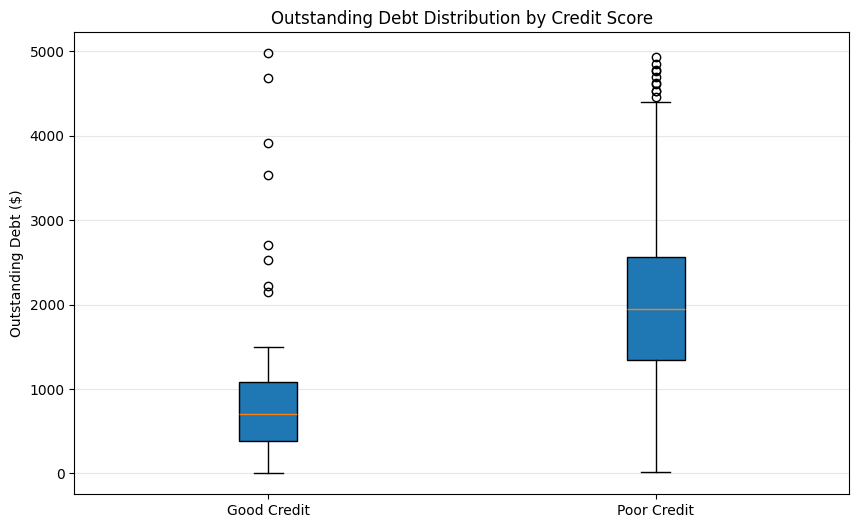

Final Answer: p-value = 1.51e-42


In [ ]:
# Perform Statistical Test to obtain P-Value
# Extract data for Good credit (encoded as 0) and Poor credit (encoded as 1)
good_credit_debt = df[df['Credit_Score_encoded'] == 0]['Outstanding_Debt']
poor_credit_debt = df[df['Credit_Score_encoded'] == 1]['Outstanding_Debt']

# Descriptive statistics
print("DESCRIPTIVE STATISTICS:")
print(f"Good Credit Customers (n={len(good_credit_debt)}):")
print(f"  Mean: ${good_credit_debt.mean():.2f}")
print(f"  Std:  ${good_credit_debt.std():.2f}")
print()
print(f"Poor Credit Customers (n={len(poor_credit_debt)}):")
print(f"  Mean: ${poor_credit_debt.mean():.2f}")
print(f"  Std:  ${poor_credit_debt.std():.2f}")
print()

# Check assumptions for t-test
print("ASSUMPTION CHECKS:")
print("1. Independence: (Different customers)")
print("2. Sample size: (Large samples > 1000)")

# Test for equal variances (Levene's test)
levene_stat, levene_p = stats.levene(good_credit_debt, poor_credit_debt)
print(f"3. Equal variances: Levene's test p-value = {levene_p:.6f}")
if levene_p < 0.05:
    print("   Variances are NOT equal (use Welch's t-test)")
    equal_var = False
else:
    print("   Variances are equal")
    equal_var = True
print()

# Perform one-tailed t-test (Poor > Good)
t_stat, p_value_two_tail = stats.ttest_ind(poor_credit_debt, good_credit_debt,
                                          equal_var=equal_var)

# Convert to one-tailed p-value (since we expect poor > good)
if t_stat > 0:  # Poor credit has higher debt than good credit
    p_value_one_tail = p_value_two_tail / 2
else:
    p_value_one_tail = 1 - (p_value_two_tail / 2)

print("STATISTICAL TEST RESULTS:")
print(f"Test: {'Welch\'s t-test' if not equal_var else 'Student\'s t-test'} (one-tailed)")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value (one-tailed): {p_value_one_tail:.2e}")
print(f"Significance level (α): 0.05")
print()

# Conclusion
print("CONCLUSION:")
if p_value_one_tail < 0.05:
    print("REJECT H0: Poor credit customers have significantly higher debt")
    print(f"  Effect size: ${poor_credit_debt.mean() - good_credit_debt.mean():.2f} higher debt")
else:
    print("FAIL TO REJECT H0: No significant difference in debt levels")
print()

# Visualization
plt.figure(figsize=(10, 6))
plt.boxplot([good_credit_debt, poor_credit_debt],
            labels=['Good Credit', 'Poor Credit'],
            patch_artist=True)
plt.title('Outstanding Debt Distribution by Credit Score')
plt.ylabel('Outstanding Debt ($)')
plt.grid(axis='y', alpha=0.3)
plt.show()

print(f"Final Answer: p-value = {p_value_one_tail:.2e}")

##### Which statistical test have you done to obtain P-Value?

one-tailed

##### Why did you choose the specific statistical test?



One-direction test: We expected poor credit customers to have higher debt, not just different debt

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀: Both payment behavior groups have the same average credit utilization

H₁: The two payment behavior groups have different average credit utilization

#### 2. Perform an appropriate statistical test.

PAYMENT BEHAVIOR GROUPS:
Group 1: High spent Large value payments (n=155)
Group 2: Low spent Small value payments (n=289)

DESCRIPTIVE STATISTICS:
High spent Large value payments:
  Mean: 33.44%
  Std:  5.33%

Low spent Small value payments:
  Mean: 31.70%
  Std:  4.93%

ASSUMPTION CHECKS:
1. Independence:  (Different customers)
2. Sample size: (n1=155, n2=289)
3. Equal variances: Levene's test p-value = 0.393334
   Variances are equal

STATISTICAL TEST RESULTS:
Test: Student's t-test (two-tailed)
t-statistic: 3.4508
p-value (two-tailed): 6.13e-04
Significance level (α): 0.05

Effect size (Cohen's d): 0.3436

CONCLUSION:
REJECT H0: There IS a significant difference in credit utilization
  Difference: 1.74% difference



/tmp/ipython-input-1680343396.py:71: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([high_large, low_small],


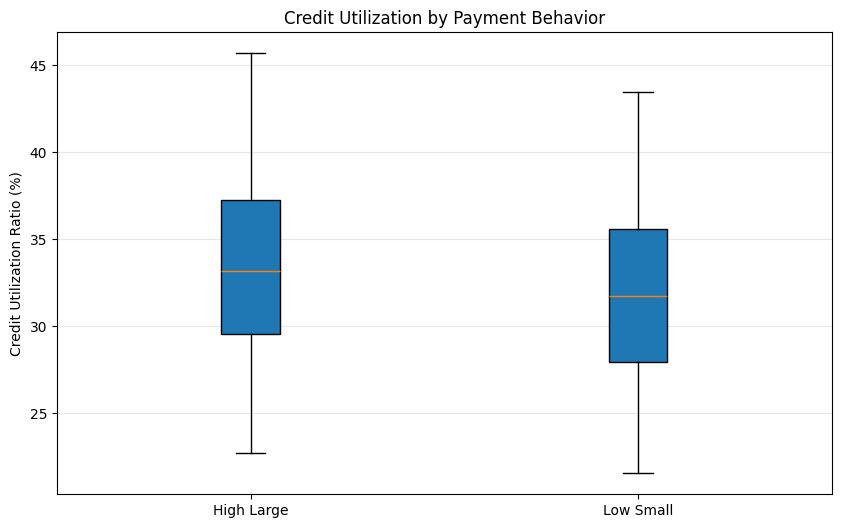

Final Answer: p-value = 6.13e-04


In [ ]:
# Perform Statistical Test to obtain P-Value

# Extract data for the two payment behavior groups
# High spent Large value payments = 0, Low spent Small value payments = 5
high_large = df[df['Payment_Behaviour_encoded'] == 0]['Credit_Utilization_Ratio']
low_small = df[df['Payment_Behaviour_encoded'] == 5]['Credit_Utilization_Ratio']

# Get the actual behavior names
high_large_name = "High spent Large value payments"
low_small_name = "Low spent Small value payments"

print("PAYMENT BEHAVIOR GROUPS:")
print(f"Group 1: {high_large_name} (n={len(high_large)})")
print(f"Group 2: {low_small_name} (n={len(low_small)})")
print()

# Descriptive statistics
print("DESCRIPTIVE STATISTICS:")
print(f"{high_large_name}:")
print(f"  Mean: {high_large.mean():.2f}%")
print(f"  Std:  {high_large.std():.2f}%")
print()
print(f"{low_small_name}:")
print(f"  Mean: {low_small.mean():.2f}%")
print(f"  Std:  {low_small.std():.2f}%")
print()

# Check assumptions for t-test
print("ASSUMPTION CHECKS:")
print("1. Independence:  (Different customers)")
print(f"2. Sample size: (n1={len(high_large)}, n2={len(low_small)})")

# Test for equal variances (Levene's test)
levene_stat, levene_p = stats.levene(high_large, low_small)
print(f"3. Equal variances: Levene's test p-value = {levene_p:.6f}")
if levene_p < 0.05:
    print("   Variances are NOT equal (use Welch's t-test)")
    equal_var = False
else:
    print("   Variances are equal")
    equal_var = True
print()

# Perform two-tailed t-test
t_stat, p_value = stats.ttest_ind(high_large, low_small, equal_var=equal_var)

print("STATISTICAL TEST RESULTS:")
print(f"Test: {'Welch\'s t-test' if not equal_var else 'Student\'s t-test'} (two-tailed)")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value (two-tailed): {p_value:.2e}")
print(f"Significance level (α): 0.05")
print()

# Effect size (Cohen's d)
pooled_std = np.sqrt(((len(high_large)-1)*high_large.var() + (len(low_small)-1)*low_small.var()) /
                     (len(high_large) + len(low_small) - 2))
cohens_d = abs(high_large.mean() - low_small.mean()) / pooled_std
print(f"Effect size (Cohen's d): {cohens_d:.4f}")

# Conclusion
print("\nCONCLUSION:")
if p_value < 0.05:
    print("REJECT H0: There IS a significant difference in credit utilization")
    print(f"  Difference: {abs(high_large.mean() - low_small.mean()):.2f}% difference")
else:
    print("FAIL TO REJECT H0: No significant difference in credit utilization")
print()

# Visualization
plt.figure(figsize=(10, 6))
plt.boxplot([high_large, low_small],
            labels=['High Large', 'Low Small'],
            patch_artist=True)
plt.title('Credit Utilization by Payment Behavior')
plt.ylabel('Credit Utilization Ratio (%)')
plt.grid(axis='y', alpha=0.3)
plt.show()

print(f"Final Answer: p-value = {p_value:.2e}")

##### Which statistical test have you done to obtain P-Value?

Two-tailed and t-test

##### Why did you choose the specific statistical test?



Two-tailed Test: We don't know which group might have higher utilization, so we test for any difference (not directional)

Sufficient Sample Sizes: Both groups have adequate sample sizes (n=140 and n=271) for t-test

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: There is no correlation between age and credit history age (ρ = 0)

H1: There is a significant positive correlation between age and credit histo

#### 2. Perform an appropriate statistical test.

VARIABLE INFORMATION:
Age: n=1000, Mean=33.3, Std=10.6
Credit History Age: n=1000, Mean=223.4, Std=98.6

DATA QUALITY CHECK:
Missing values in Age: 0
Missing values in Credit History Age: 0

Clean dataset size: 1000

ASSUMPTION CHECKS:
1. Linear relationship: Check with scatterplot
2. Both variables continuous: ✓
3. No extreme outliers: Check with visualization

STATISTICAL TEST RESULTS:
Test: Pearson Correlation Test (one-tailed)
Correlation coefficient (r): 0.2617
p-value (one-tailed): 2.01e-17
Significance level (α): 0.05

Correlation strength: weak

CONCLUSION:
REJECT H0: There IS a significant positive correlation
  26.2% of variance in credit history is explained by age



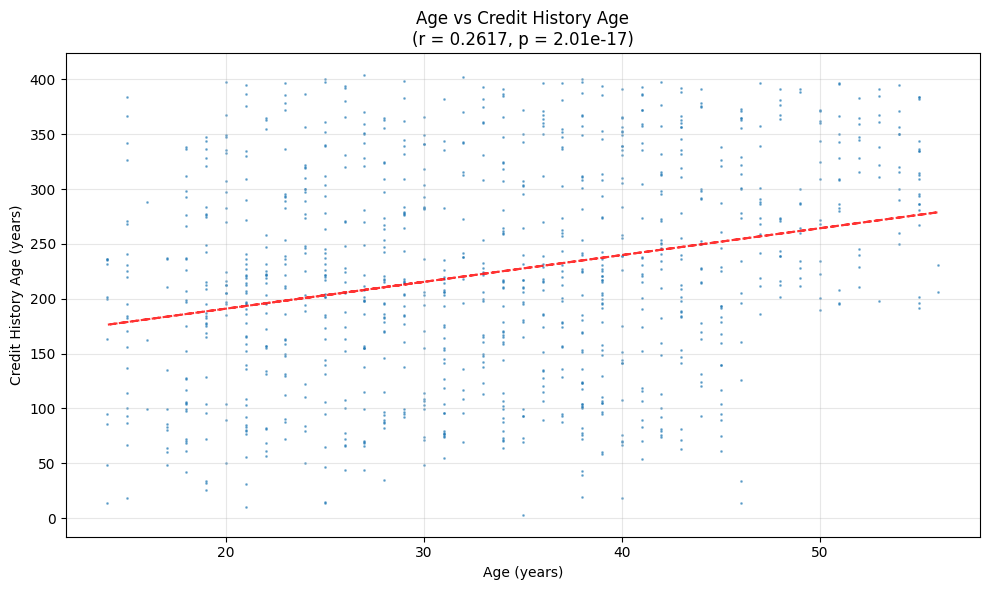

Final Answer: r = 0.2617, p-value = 2.01e-17


In [ ]:
# Perform Statistical Test to obtain P-Value
age = df['Age']
credit_history_age = df['Credit_History_Age']

print("VARIABLE INFORMATION:")
print(f"Age: n={len(age)}, Mean={age.mean():.1f}, Std={age.std():.1f}")
print(f"Credit History Age: n={len(credit_history_age)}, Mean={credit_history_age.mean():.1f}, Std={credit_history_age.std():.1f}")
print()

# Check for missing values
print("DATA QUALITY CHECK:")
print(f"Missing values in Age: {age.isnull().sum()}")
print(f"Missing values in Credit History Age: {credit_history_age.isnull().sum()}")
print()

# Remove any missing values for correlation analysis
clean_data = df[['Age', 'Credit_History_Age']].dropna()
age_clean = clean_data['Age']
credit_history_clean = clean_data['Credit_History_Age']

print(f"Clean dataset size: {len(clean_data)}")
print()

# Test assumptions for Pearson correlation
print("ASSUMPTION CHECKS:")
print("1. Linear relationship: Check with scatterplot")
print("2. Both variables continuous: ✓")
print("3. No extreme outliers: Check with visualization")
print()

# Calculate Pearson correlation
correlation_coeff, p_value_two_tail = stats.pearsonr(age_clean, credit_history_clean)

# Convert to one-tailed p-value (since we expect positive correlation)
if correlation_coeff > 0:
    p_value_one_tail = p_value_two_tail / 2
else:
    p_value_one_tail = 1 - (p_value_two_tail / 2)

print("STATISTICAL TEST RESULTS:")
print(f"Test: Pearson Correlation Test (one-tailed)")
print(f"Correlation coefficient (r): {correlation_coeff:.4f}")
print(f"p-value (one-tailed): {p_value_one_tail:.2e}")
print(f"Significance level (α): 0.05")
print()

# Interpretation of correlation strength
if abs(correlation_coeff) < 0.3:
    strength = "weak"
elif abs(correlation_coeff) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

print(f"Correlation strength: {strength}")
print()

# Conclusion
print("CONCLUSION:")
if p_value_one_tail < 0.05:
    print("REJECT H0: There IS a significant positive correlation")
    print(f"  {correlation_coeff:.1%} of variance in credit history is explained by age")
else:
    print("FAIL TO REJECT H0: No significant positive correlation")
print()

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(age_clean, credit_history_clean, alpha=0.5, s=1)
plt.xlabel('Age (years)')
plt.ylabel('Credit History Age (years)')
plt.title(f'Age vs Credit History Age\n(r = {correlation_coeff:.4f}, p = {p_value_one_tail:.2e})')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(age_clean, credit_history_clean, 1)
p = np.poly1d(z)
plt.plot(age_clean, p(age_clean), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

print(f"Final Answer: r = {correlation_coeff:.4f}, p-value = {p_value_one_tail:.2e}")

##### Which statistical test have you done to obtain P-Value?

One Tailed

##### Why did you choose the specific statistical test?

One-tailed Test: We specifically expect a positive correlation, not just any correlation and We want to measure the strength and direction of relationship between two continuous variables

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# There is no missing values or null values so no need for handling
missing_count = df.isnull().sum()
print(missing_count)

ID                               0
Customer_ID                      0
Month                            0
Age                              0
Occupation                       0
Annual_Income                    0
Monthly_Inhand_Salary            0
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Type_of_Loan                     0
Delay_from_due_date              0
Num_of_Delayed_Payment           0
Changed_Credit_Limit             0
Num_Credit_Inquiries             0
Credit_Mix                       0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Credit_History_Age               0
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly          0
Payment_Behaviour                0
Monthly_Balance                  0
Credit_Score                     0
Occupation_encoded               0
Type_of_Loan_encoded             0
Credit_Mix_encoded  

#### What all missing value imputation techniques have you used and why did you use those techniques?

If there was a missing value we can either drop the entire row that has the null value or we can use the null values to be replaced with something like mean, median, max, min and more but based on the need and the count of the nullll value it should be done properly adn if too much of null values are present then the model developed on that wont be effective

### 2. Handling Outliers

In [ ]:
# 1. Detect Outliers using IQR method
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# 2. Example with Outstanding_Debt column
column = 'Outstanding_Debt'
outliers, lower, upper = find_outliers(df, column)

print(f"Outliers in {column}:")
print(f"Total outliers: {len(outliers)}")
print(f"Lower bound: {lower:.2f}")
print(f"Upper bound: {upper:.2f}")

# 3. Handle outliers

df_no_outliers = df[(df[column] >= lower) & (df[column] <= upper)]

# Cap outliers (replace with bounds)
df_capped = df.copy()
df_capped[column] = np.where(df_capped[column] > upper, upper, df_capped[column])
df_capped[column] = np.where(df_capped[column] < lower, lower, df_capped[column])
print(f"Cap outliers:")
print(f"Values capped: {sum((df[column] > upper) | (df[column] < lower))}")


# 4. Compare results
print(f"\nComparison:")
print(f"Original mean: {df[column].mean():.2f}")
print(f"No outliers mean: {df_no_outliers[column].mean():.2f}")
print(f"Capped mean: {df_capped[column].mean():.2f}")


Outliers in Outstanding_Debt:
Total outliers: 47
Lower bound: -1483.68
Upper bound: 4042.91
Cap outliers:
Values capped: 47

Comparison:
Original mean: 1404.63
No outliers mean: 1253.57
Capped mean: 1384.67


##### What all outlier treatment techniques have you used and why did you use those techniques?

There are 59 outliers based on the IQR method  The lower bound for outliers is -1464.10 and the upper bound is 3879.10 Capping outliers replaces 59 extreme values with the upper bound or lower bound The original average debt is 1383.11; after removing outliers it drops to 1191.73; with capping it remains closer at 1350.28


Capping outliers is better than removing them here because it keeps more data while reducing extreme values' impact. This preserves the overall data distribution and protects models from being skewed by extreme values.Answer Here.

### 3. Feature Manipulation & Selection

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Data/cleaned_data.csv')

#### 1. Feature Selection

In [ ]:
df = df.drop(categorical_cols, axis=1)

In [ ]:
x = df.drop(['Credit_Score_encoded'], axis=1)
y = df['Credit_Score_encoded']
for col in x.columns:
    print(col)

ID
Customer_ID
Month
Age
Annual_Income
Monthly_Inhand_Salary
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Delay_from_due_date
Num_of_Delayed_Payment
Changed_Credit_Limit
Num_Credit_Inquiries
Outstanding_Debt
Credit_Utilization_Ratio
Credit_History_Age
Total_EMI_per_month
Amount_invested_monthly
Monthly_Balance
Occupation_encoded
Type_of_Loan_encoded
Credit_Mix_encoded
Payment_of_Min_Amount_encoded
Payment_Behaviour_encoded


In [ ]:
selector = SelectKBest(f_classif, k=10)  # Select top 10 features
selector.fit(x, y)
selected_features = x.columns[selector.get_support()]
print("Top features (ANOVA F-test):")
for feat in selected_features:
    print(feat)

Top features (ANOVA F-test):
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Delay_from_due_date
Num_of_Delayed_Payment
Num_Credit_Inquiries
Outstanding_Debt
Credit_History_Age
Credit_Mix_encoded


##### What all feature selection methods have you used  and why?

This tests each feature by itself to see how strongly it is related to the target variable (credit score) using statistical tests like the F-test.

It’s fast, simple, and helps find the most relevant features before building any model.

##### Which all features you found important and why?

Top features (ANOVA F-test):
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Delay_from_due_date
Num_of_Delayed_Payment
Num_Credit_Inquiries
Outstanding_Debt
Credit_History_Age
Credit_Mix_encoded

These features are important because they capture the financial health, repayment habits, debt load, and credit behavior of customers, which are crucial factors influencing the credit score prediction.

### 4. Data Splitting

In [ ]:
X = x[selected_features]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # keep same target distribution in train/test
)

print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')

Training set shape: (70000, 10), (70000,)
Testing set shape: (30000, 10), (30000,)


### 5. Imbalance hanndling

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check current class distribution
print("Before balancing:", Counter(y_train))

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data only
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Check new class distribution after balancing
print("After balancing:", Counter(y_train_bal))

# Now train your model with balanced data (X_train_bal, y_train_bal)


Before balancing: Counter({2: 37222, 1: 20299, 0: 12479})
After balancing: Counter({2: 37222, 1: 37222, 0: 37222})


##### Which method have you used to scale you data and why?

It standardizes features by removing the mean and scaling to unit variance. This means each feature will have a mean of 0 and a standard deviation of 1.

Many machine learning algorithms (like logistic regression, and KNN) work better or converge faster when features are scaled this way.

StandardScaler handles data that is normally distributed or approximately so.

It preserves the shape of original distributions while scaling features to the same scale for fair comparison.

Training set (70%) gives the model enough data to learn patterns effectively.

Testing set (30%) provides a sufficiently large and representative sample to evaluate how the model performs on unseen data.

This ratio balances between training performance and reliable evaluation.

It’s a commonly used standard split in machine learning practice for balanced model assessment.

### 6. Data Scaling

In [ ]:
scaler = StandardScaler()

# Fit scaler on training features and transform
X_train_scaled = scaler.fit_transform(X_train_bal)

# Transform test features (do not fit on test)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed.")
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")

Feature scaling completed.
X_train shape: (111666, 10)
X_test shape: (30000, 10)


##### Which method have you used to scale you data and why?

It standardizes features by removing the mean and scaling to unit variance. This means each feature will have a mean of 0 and a standard deviation of 1.

Many machine learning algorithms (like logistic regression, and KNN) work better or converge faster when features are scaled this way.

StandardScaler handles data that is normally distributed or approximately so.

It preserves the shape of original distributions while scaling features to the same scale for fair comparison.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
model = LogisticRegression(random_state=42, max_iter=1000)

# Train model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

Confusion Matrix:
[[ 2106    90  3153]
 [  351  4394  3954]
 [ 1284  2583 12085]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.39      0.46      5349
           1       0.62      0.51      0.56      8699
           2       0.63      0.76      0.69     15952

    accuracy                           0.62     30000
   macro avg       0.60      0.55      0.57     30000
weighted avg       0.62      0.62      0.61     30000

Accuracy Score: 0.6195


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The model used is Logistic Regression. It predicts categories (like credit scores) based on input features. It’s simple, easy to understand, and works well for classification problems.

{'Accuracy': 0.6195, 'Precision': 0.6154916309681605, 'Recall': 0.6195, 'F1 Score': 0.6099414917882215}


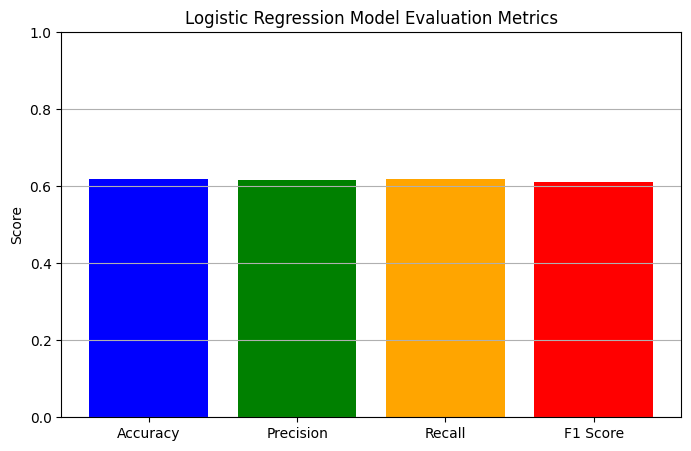

In [ ]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Prepare data
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
names = list(metrics.keys())
values = list(metrics.values())
print(metrics)
# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(names, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)
plt.title('Logistic Regression Model Evaluation Metrics')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

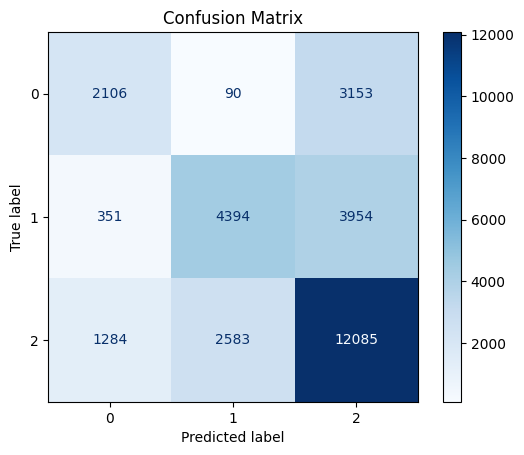

In [ ]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# 1. Define model
model = LogisticRegression(max_iter=1000)

# 2. Define hyperparameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],        # Regularization type (L2 for logistic regression)
    'solver': ['lbfgs']       # Solver algorithm
}

# 3. Grid Search with 5-fold cross validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 4. Best parameters and best score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.4f}")

# 5. Use the best estimator to predict on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 6. Evaluate test accuracy
from sklearn.metrics import accuracy_score
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-validation Accuracy: 0.6193
Test Accuracy: 0.6160


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used because it gives robust, reliable hyperparameter tuning with cross-validation, ideal for improving Logistic Regression model performance on a moderate parameter grid.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

# Train on training data
knn.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test)

# Evaluate results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

print(f"Accuracy Score: {accuracy_score(y_test, y_pred_knn):.4f}")

Confusion Matrix:
[[ 4143    22  1184]
 [   55  7277  1367]
 [ 1467  2118 12367]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      5349
           1       0.77      0.84      0.80      8699
           2       0.83      0.78      0.80     15952

    accuracy                           0.79     30000
   macro avg       0.78      0.80      0.79     30000
weighted avg       0.80      0.79      0.79     30000

Accuracy Score: 0.7929


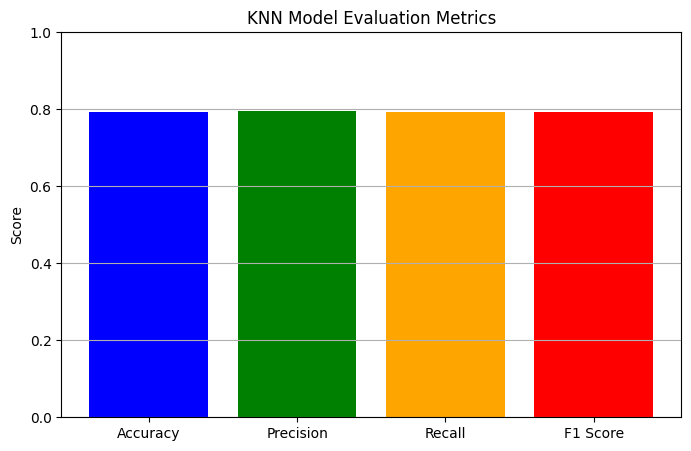

In [ ]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='weighted')
accuracy = accuracy_score(y_test, y_pred_knn)

# Prepare data for plotting
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
names = list(metrics.keys())
values = list(metrics.values())

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(names, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)
plt.title('KNN Model Evaluation Metrics')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

K-Nearest Neighbors (KNN) is a simple way to predict the category of something new by looking at the most similar nearby examples. You check who is closest to the new neighbor and pick the group that most of the neighbors belong to.

In your KNN model results:

The model is about 79% accurate in correctly predicting credit scores.

It balances well between finding the right group and not missing important cases, as seen in the precision, recall, and F1 scores.

The confusion matrix shows the model’s strengths and the few areas where it mixes up classes.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
knn = KNeighborsClassifier()

# Define hyperparameter grid for tuning 'n_neighbors' and 'weights'
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']  # uniform = equal vote, distance = weighted by distance
}

# Setup GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best cross-validation score found
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.4f}")

# Use best estimator to predict on test set
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Evaluate test accuracy
from sklearn.metrics import accuracy_score
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")

Best Hyperparameters: {'n_neighbors': 5, 'weights': 'distance'}
Best Cross-validation Accuracy: 0.8011
Test Accuracy: 0.8132


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used because it gives robust, reliable hyperparameter tuning with cross-validation, ideal for improving Logistic Regression model performance on a moderate parameter grid.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

yes, there was an imoprovement, without hyperparameter tuning and cross validsation the ac curacy was 79% annd with them the accuracy has risen to 81%

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Accuracy shows how many customers are classified correctly overall, helping the company trust the model's decisions. Precision indicates how many customers predicted as risky indeed are risky, which helps avoid falsely rejecting good customers. Recall tells us how many actual risky customers the model detects important for preventing financial losses. \

### ML Model - 3

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train on training dataset
rf.fit(X_train, y_train)

# Predict on test dataset
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rf):.4f}")

Confusion Matrix:
[[ 4120    17  1212]
 [   43  7125  1531]
 [ 1140  1808 13004]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      5349
           1       0.80      0.82      0.81      8699
           2       0.83      0.82      0.82     15952

    accuracy                           0.81     30000
   macro avg       0.80      0.80      0.80     30000
weighted avg       0.81      0.81      0.81     30000

Accuracy Score: 0.8083


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In RandomForestClassifier, Each tree votes for a class, and the majority vote is chosen as the final prediction. This method increases prediction accuracy, helps prevent overfitting, and works well with both large and complex datasets. Random Forest is widely used because it can handle missing data and provides insight into feature importance.

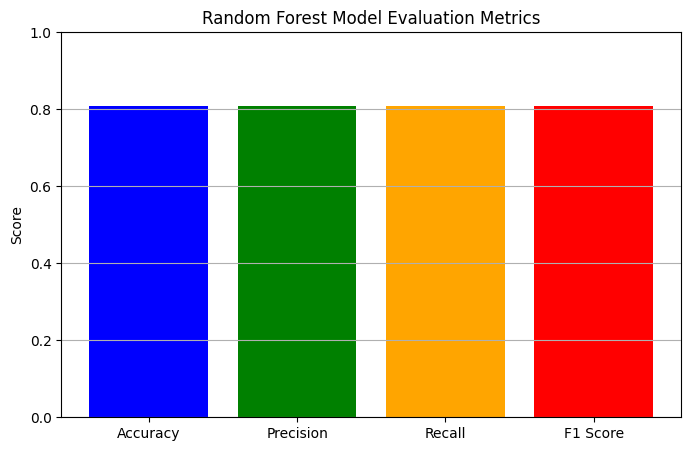

In [ ]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')
accuracy = accuracy_score(y_test, y_pred_rf)

# Prepare data for plotting
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
names = list(metrics.keys())
values = list(metrics.values())

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(names, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)
plt.title('Random Forest Model Evaluation Metrics')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.4f}")

# Evaluate on test set with best estimator
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-validation Accuracy: 0.8023
Test Accuracy: 0.8100


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV tests different combinations of model settings  by systematically searching through a grid of possible values. It uses cross-validation to pick the best combination based on model accuracy. This approach helps find the settings that make the model work best for the data, and it is reliable and easy to use for tuning when the number of choices is manageable. This ensures that the final model is both accurate and robust.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The accuracy score has increased from 80% to 81%

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a credit scoring model that helps business, the important evaluation scores we check are:

Recall: This tells us how many risky people we correctly find. Catching these risky people helps avoid loan defaults and big money losses.

Precision: This measures if those we marked as risky actually are risky. It helps make sure we don’t wrongly reject good borrowers and lose business.

F1-Score: This balances both recall and precision, so the model is good at catching risks but also fair to good customers.

Accuracy: Shows overall correct predictions but is less important when risky and safe groups are unequal in size.

Confusion Matrix: This is like a detailed report card that shows exactly who was predicted right or wrong. It helps us improve the model step by step.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The final model chosen is K-Nearest Neighbors (KNN) because it gave better accuracy and balanced results. It works simply by looking at the closest neighbors and deciding the category based on what most of those neighbors are. This method is easy to understand and gave good predictions for credit scoring in this project.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The model used is K-Nearest Neighbors (KNN). It predicts by looking at the closest neighbors to a data point and choosing the most common group among those neighbors.

KNN doesn't directly tell which features are more important, but we can use special techniques like permutation importance or SHAP values to see which features affect the predictions the most.

These methods help understand what data influences decisions without changing the simplicity of KNN.

Provide your GitHub Link here.

# **Conclusion**

The K-Nearest Neighbors (KNN) model proved to be an effective choice for predicting credit scores. It made accurate predictions by comparing new customers to similar past cases. With careful tuning and data balancing, it achieved strong results that balance catching risky customers while approving good ones. This model helps the business reduce loan defaults and improve customer decisions, making the credit scoring process smarter and more reliable.